🧠🔮 Prediction of Brain Stroke

❓Problem Statement
Stroke:
1. Increased incident of Stroke
2. High Healthcare costs
3. Lack of reliable prediction tools

About The Disease :

A medical emergency that occurs due to the interruption of flow of blood to a part of brain because of bleeding or blood clots. Worldwide, it is the second major reason for deaths with an annual mortality rate of 5.5 million. Every year, more than 15 million people worldwide have a stroke, and in every 4 minutes, someone dies due to stroke. A stroke is generally a consequence of a poor style of living and hence, preventable in up to 80% of the cases. Therefore, the prediction of stroke becomes necessary and should be used to prevent permanent damage by stroke.

🩺 Types of Stroke
There are three main types of stroke:
1. Ischemic Stroke: This is the most common type, occurring when a blood clot or plaque blocks a blood vessel in the brain, cutting off the blood supply. It accounts for about 85% of all strokes.
2. Hemorrhagic Stroke: This type occurs when a blood vessel in the brain ruptures, causing bleeding in or around the brain. It is often caused by high blood pressure or aneurysms.
Transient Ischemic Attack (TIA): Often referred to as a "mini-stroke," TIAs are brief episodes of stroke-like symptoms caused by a temporary blockage of blood flow to the brain. While symptoms usually resolve within minutes to hours, TIAs can be a warning sign of a future stroke.
Each type of stroke requires different treatments, making early diagnosis crucial for improving outcomes.

https://images.app.goo.gl/pz8uuqeZCSfSCLn78

🎯 Aim of the Project:
The main goal of the stroke prediction project is to save lives by detecting stroke risks early and providing timely medical intervention recommendations. It aims to reduce healthcare costs for patients and medical institutions through effective prevention while improving patients' quality of life by mitigating the risk of stroke.

Objective

1. Building an accurate stroke prediction model
2. Identifying key risk factors
3. Providing actionable insights

Metreics
1. Recall
2. Precision
3. F1-Score

💿 Dataset Description:
The dataset used in this project contains medical records of patients and their associated risk factors for stroke. It includes the following features:



# About data
1. Id: Unique identification number for each patient.
2. Age: The age of the patient.
3. Hypertension: Whether the patient has hypertension (1 for yes, 0 for no).
4. Heart Disease: Whether the patient has a history of heart disease (1 for yes, 0 for no).
5. Ever Married: Whether the patient has been married (1 for yes, 0 for no).
6. Work Type: The type of work the patient does (e.g., private, self-employed, government, children).
7. Residence Type: Whether the patient resides in an urban or rural area.
8. Glucose Level: The patient's glucose level.
9. BMI (Body Mass Index): A measure of body fat based on height and weight.
10. Smoking Status: The smoking habit of the patient (e.g., never smoked, formerly smoked, currently smoking).
11. Stroke: The target variable indicating whether the patient had a stroke (1 for yes, 0 for no).

## Import The Libraries

In [ ]:
!pip install scikit-learn

In [ ]:
!pip install imbalanced-learn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score,roc_auc_score,accuracy_score,confusion_matrix,precision_recall_curve,auc,roc_curve,recall_score, classification_report
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,roc_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [ ]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
df = dataset.copy()

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data Prepocessing

# Find missing values and duplicated data

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Replacing Missing Value with Median

In [ ]:
# fill missing value in the BMI column with the median
df['bmi'].fillna(df['bmi'].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


## Drop id column because unecessary

In [ ]:
df.drop('id',axis=1,inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Encoding Categorical Variable

In [ ]:
categorical = ['gender' ,'ever_married','work_type','Residence_type','smoking_status']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi']

In [ ]:
print('work_type : ', df['work_type'].unique())
print('gender : ', df['gender'].unique())
print('Residence_type : ', df['Residence_type'].unique())
print('ever"_married : ', df['ever_married'].unique())
print('smoking_status : ', df['smoking_status'].unique())

work_type :  ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
gender :  ['Male' 'Female' 'Other']
Residence_type :  ['Urban' 'Rural']
ever"_married :  ['Yes' 'No']
smoking_status :  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [ ]:
# encoding meggunakan label encoder
le = LabelEncoder()
smoking_status = le.fit_transform(df['smoking_status'])
gender = le.fit_transform(df['gender'])
ever_married = le.fit_transform(df['ever_married'])
Residence_type = le.fit_transform(df['Residence_type'])
work_type = le.fit_transform(df['work_type'])

In [ ]:
df['work_type'] = work_type
df['gender'] = gender
df['Residence_type'] = Residence_type
df['ever_married'] = ever_married
df['smoking_status'] = smoking_status

In [ ]:
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
df.nunique()

,0
gender,3
age,104
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,418
smoking_status,4


# Exploratory Data Analysis

## Multivariate Analysis

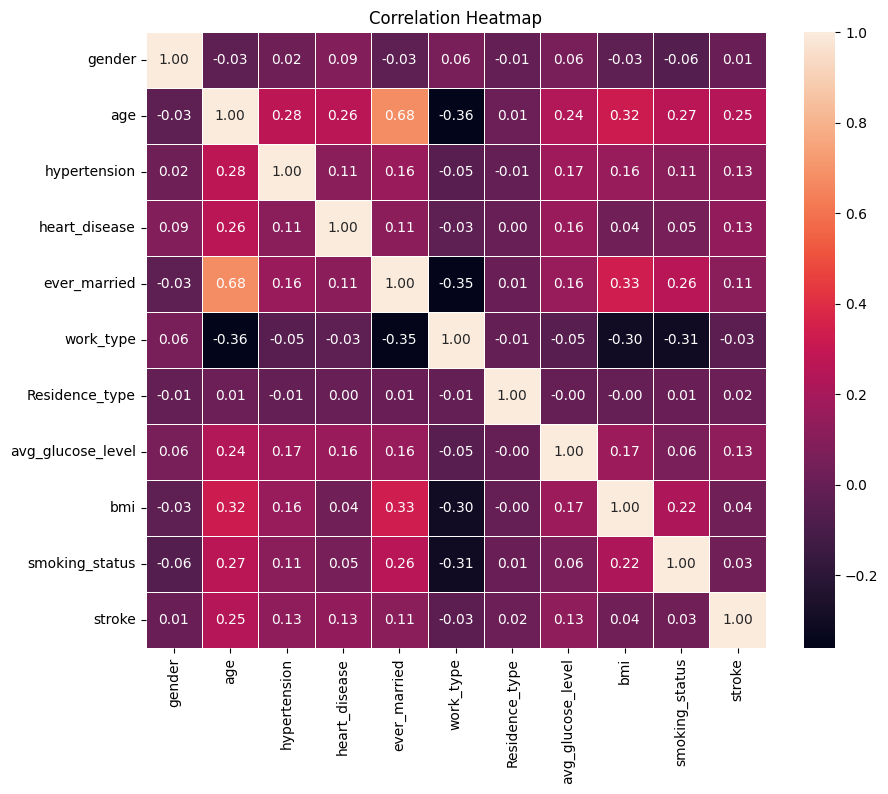

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Observations

Strongest Positive Correlations:
- Age and Ever_married (0.68) show the strongest positive correlation, which is logical
- Age shows moderate positive correlations with BMI (0.33), hypertension (0.28), and smoking_status (0.27)

Notable Negative Correlations:
- Work_type has several negative correlations:
  - with age (-0.36)
  - with ever_married (-0.35)
  - with smoking_status (-0.31)
  - with BMI (-0.30)

Stroke Correlations:
- Stroke has weak positive correlations with most features
- Age has the strongest correlation with stroke (0.25)
- Heart_disease and hypertension both show weak positive
correlations (0.13) with stroke

Weak/No Correlations:
- Residence_type shows almost no correlation with any other variables (all values near 0)
- Gender has very weak correlations with all other variables
Most correlations in the dataset are relatively weak (below 0.3)

Health Factors:
- BMI, hypertension, and heart_disease show some intercorrelations, suggesting related health conditions
- Average glucose level has weak to moderate positive correlations with age (0.24) and other health indicators

This suggests that age is the most influential factor for stroke prediction.

## Univariate Analysis

In [ ]:
print(df['age'].value_counts())
print(df['ever_married'].value_counts())
print(df['hypertension'].value_counts())
print(df['heart_disease'].value_counts())
print(df['ever_married'].value_counts())
print(df['avg_glucose_level'].value_counts())

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64
ever_married
1    3353
0    1757
Name: count, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
1    3353
0    1757
Name: count, dtype: int64
avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64


In [ ]:
print(dataset['age'].value_counts())
print(dataset['ever_married'].value_counts())
print(dataset['hypertension'].value_counts())
print(dataset['heart_disease'].value_counts())
print(dataset['ever_married'].value_counts())
print(dataset['avg_glucose_level'].value_counts())

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
avg_glucose_level
93.88     6
91.68     5
91.85     5
83.16     5
73.00     5
         ..
111.93    1
94.40     1
95.57     1
66.29     1
85.28     1
Name: count, Length: 3979, dtype: int64


### Age Analysis

In [ ]:
bins = [0, 15, 20, 30, 55, 100]
labels = ['Child', 'Young Adult','Mid Adult', 'Adult', 'Elderly']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Menampilkan hasil
print(df[['age', 'age_group']].head(10))

    age age_group
0  67.0   Elderly
1  61.0   Elderly
2  80.0   Elderly
3  49.0     Adult
4  79.0   Elderly
5  81.0   Elderly
6  74.0   Elderly
7  69.0   Elderly
8  59.0   Elderly
9  78.0   Elderly


In [ ]:
df['age_group'].value_counts()

,count
age_group,
Adult,1844
Elderly,1696
Child,744
Mid Adult,545
Young Adult,281


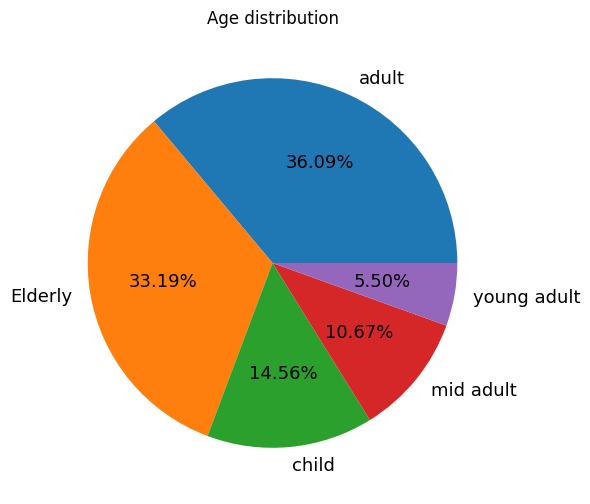

In [ ]:
# Age Analysis
plt.figure(figsize = (6, 6))
temp = [1844,1696,744,545,281]
labels = ['adult','Elderly','child','mid adult','young adult']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Age distribution')
plt.show()

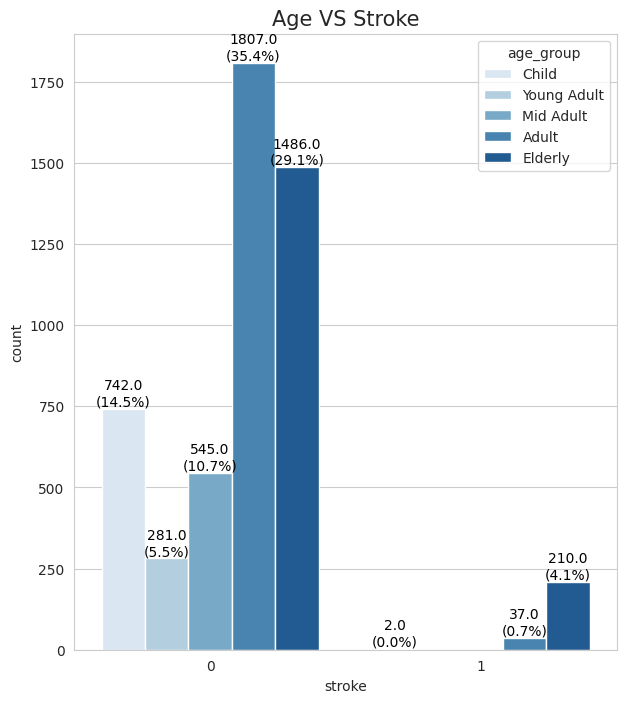

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(7, 8))
ax = sns.countplot(x=df['stroke'], hue=df['age_group'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Age VS Stroke", fontsize=15)
plt.show()

### Average Glucose Level Analysis

In [ ]:
bins = [50, 100, 160, 200, 300]
labels = ['Low', 'Normal','High', 'Very High']

df['avg_glucose_level_group'] = pd.cut(df['avg_glucose_level'], bins=bins, labels=labels, right=True)

# Menampilkan hasil
print(df[['avg_glucose_level', 'avg_glucose_level_group']].head(10))

   avg_glucose_level avg_glucose_level_group
0             228.69               Very High
1             202.21               Very High
2             105.92                  Normal
3             171.23                    High
4             174.12                    High
5             186.21                    High
6              70.09                     Low
7              94.39                     Low
8              76.15                     Low
9              58.57                     Low


In [ ]:
df['avg_glucose_level'].value_counts()

,count
avg_glucose_level,
93.88,6
91.68,5
91.85,5
83.16,5
73.00,5
...,...
111.93,1
94.40,1
95.57,1


In [ ]:
avg_glucose_level_counts = df['avg_glucose_level_group'].value_counts()
print(avg_glucose_level_counts)

avg_glucose_level_group
Low          3131
Normal       1311
Very High     434
High          234
Name: count, dtype: int64


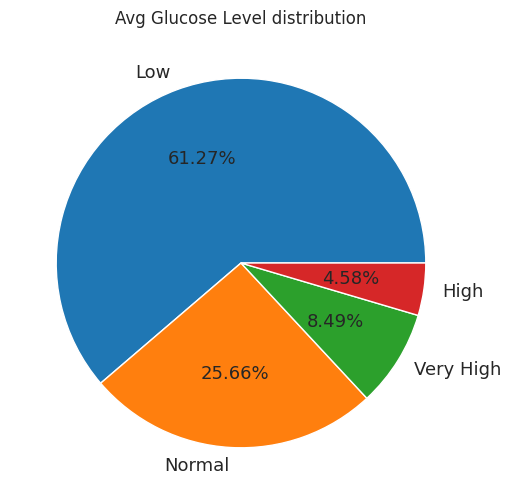

In [ ]:
# Avg_glucose Analysis
plt.figure(figsize = (6, 6))
temp = [3131,1311,434,234]
labels = ['Low','Normal','Very High','High']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Avg Glucose Level distribution')
plt.show()

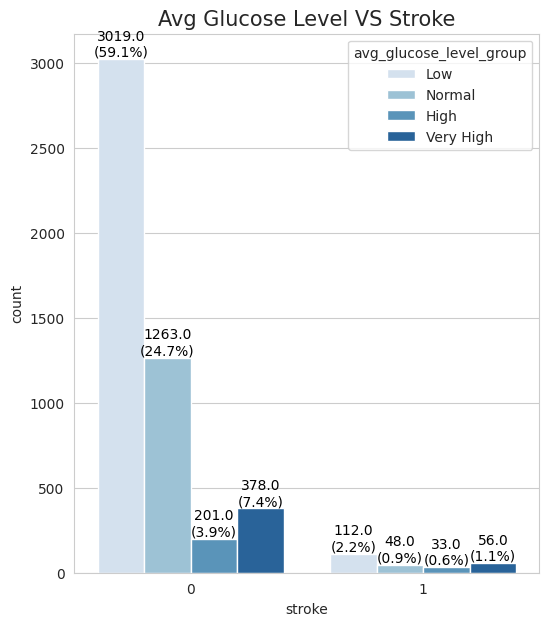

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(6, 7))
ax = sns.countplot(x=df['stroke'], hue=df['avg_glucose_level_group'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Avg Glucose Level VS Stroke", fontsize=15)
plt.show()

### Gender Analysis

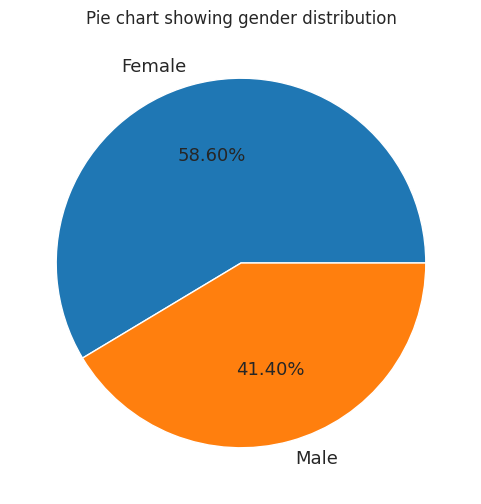

In [ ]:
# Gender Analysis
plt.figure(figsize = (6, 6))
temp = [2994,2115]
labels = ['Female','Male']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart showing gender distribution')
plt.show()

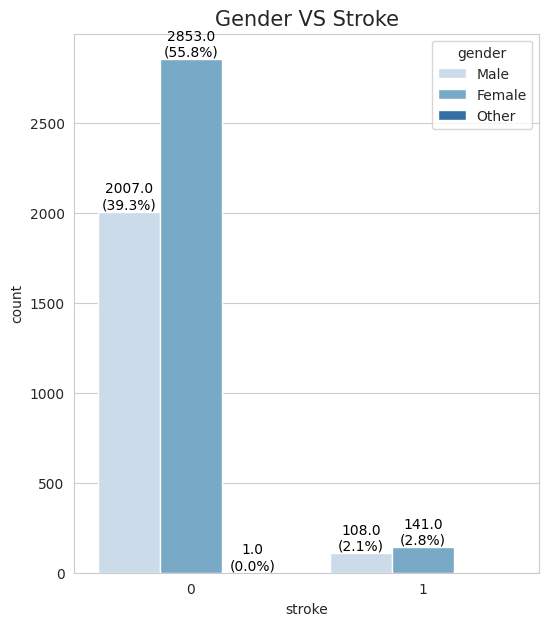

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(6, 7))
ax = sns.countplot(x=df['stroke'], hue=dataset['gender'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Gender VS Stroke", fontsize=15)
plt.show()

### Residence type Analysis

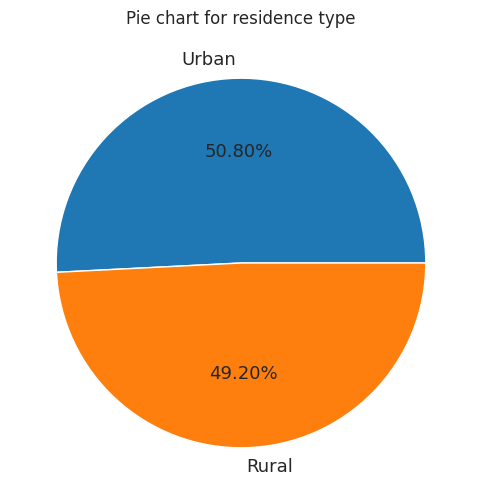

In [ ]:
# Analysis of residence type
plt.figure(figsize = (6, 6))
temp = [2596,2514]
labels = ['Urban','Rural']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%', textprops=textprops)
plt.title('Pie chart for residence type')
plt.show()

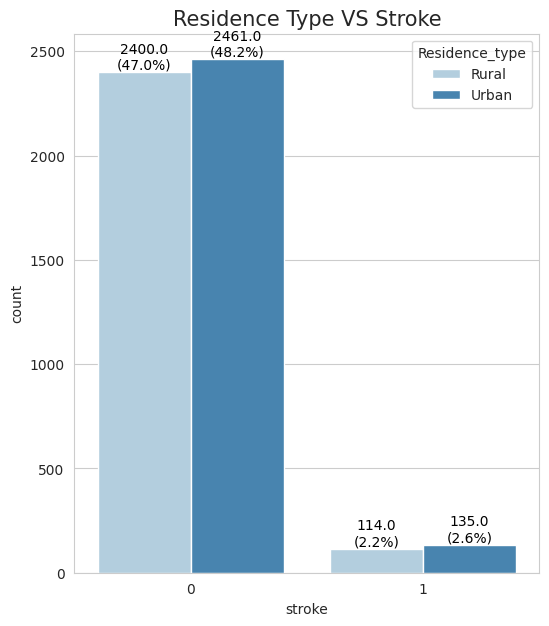

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(6, 7))
ax = sns.countplot(x=df['stroke'], hue=dataset['Residence_type'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Residence Type VS Stroke", fontsize=15)
plt.show()

### Marriage Analysis

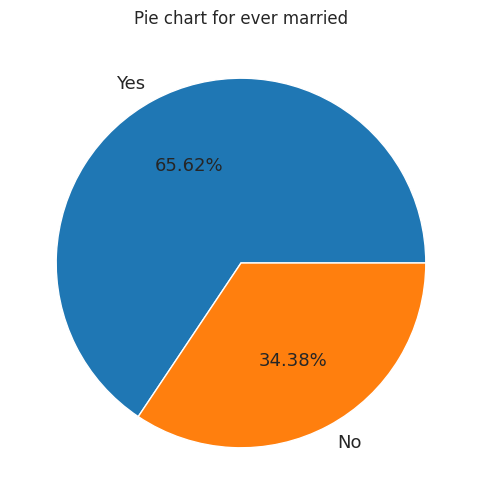

In [ ]:
# Analysis of ever married
plt.figure(figsize = (6, 6))
temp = [3353,1757]
labels = ['Yes','No']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart for ever married')
plt.show()

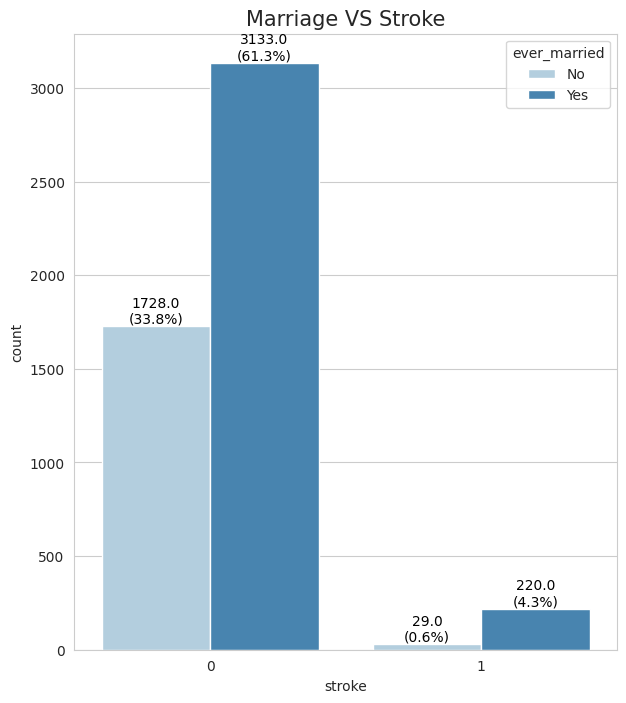

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(7, 8))
ax = sns.countplot(x=df['stroke'], hue=dataset['ever_married'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Marriage VS Stroke", fontsize=15)
plt.show()

### Work Type Analysis

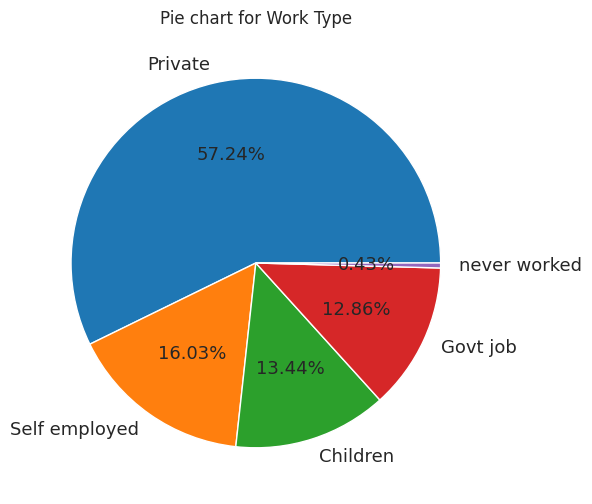

In [ ]:
# Work type analysis
plt.figure(figsize=(6,6))
wt1 = [2925,819,687, 657, 22]
textprops = {"fontsize":13}
plt.pie(wt1,labels=['Private','Self employed', 'Children','Govt job','never worked'], autopct='%1.2f%%',textprops=textprops)
plt.title('Pie chart for Work Type')
plt.show()

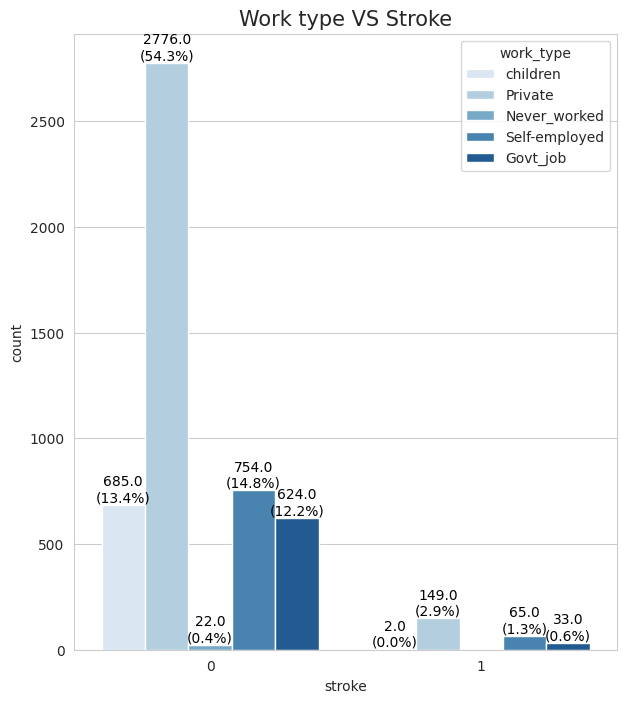

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(7, 8))
ax = sns.countplot(x=df['stroke'], hue=dataset['work_type'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Work type VS Stroke", fontsize=15)
plt.show()

### Smoking Status Analysis

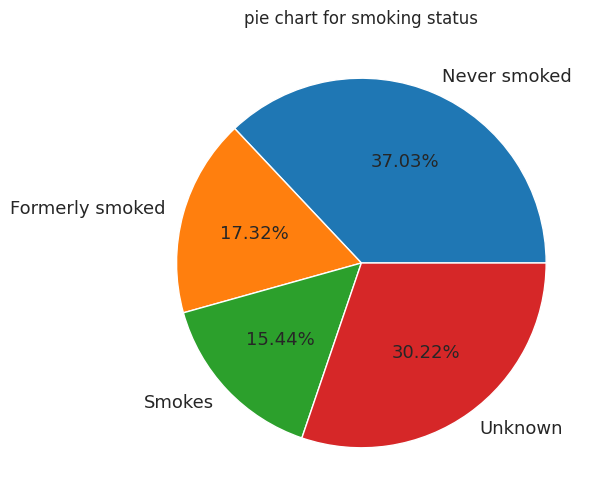

In [ ]:
# Smoking status analysis
plt.figure(figsize = (6, 6))
temp = [1892,885,789,1544]
labels = ['Never smoked','Formerly smoked', 'Smokes','Unknown']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('pie chart for smoking status')
plt.show()

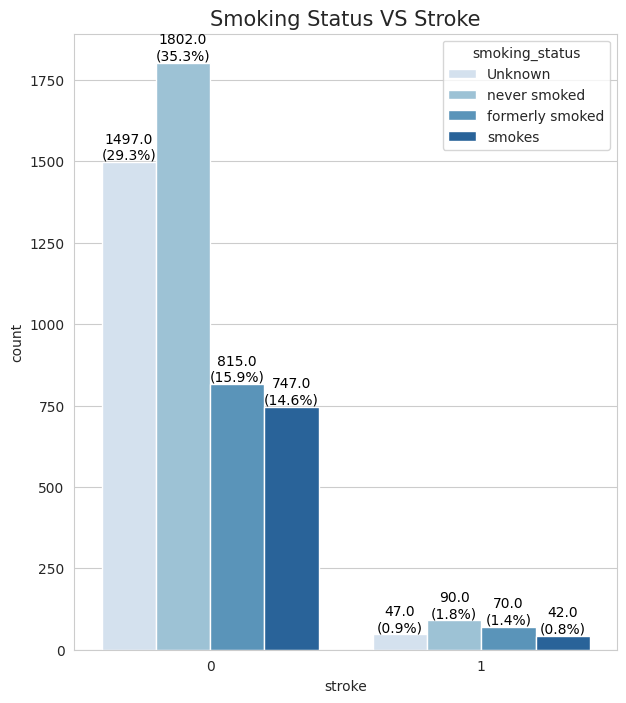

In [ ]:
# Smoking status analysis
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(7, 8))
ax = sns.countplot(x=df['stroke'], hue=dataset['smoking_status'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Smoking Status VS Stroke", fontsize=15)
plt.show()

### Hypertension Analysis

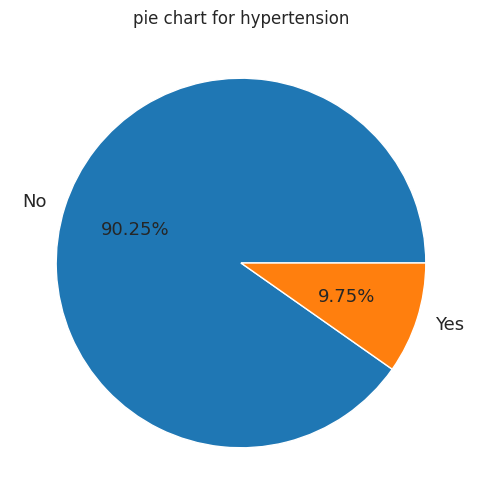

In [ ]:
# hypertension status analysis
plt.figure(figsize = (6, 6))
temp = [4612,498]
labels = ['No','Yes']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('pie chart for hypertension')
plt.show()



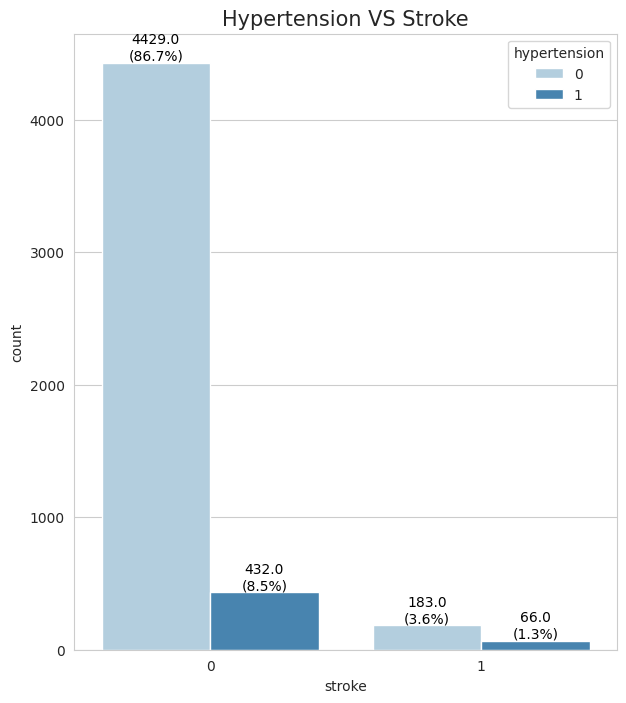

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(7, 8))
ax = sns.countplot(x=df['stroke'], hue=dataset['hypertension'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Hypertension VS Stroke", fontsize=15)
plt.show()

### Heart Disease Analysis

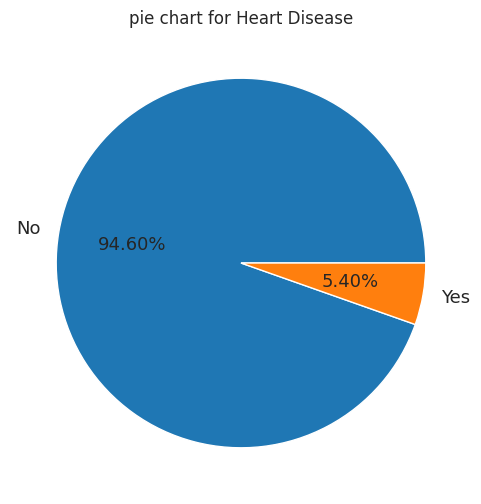

In [ ]:
# heart disease Analysis
plt.figure(figsize = (6, 6))
temp = [4834,276]
labels = ['No','Yes']
textprops = {"fontsize":13}
plt.pie(temp,labels=labels,autopct='%1.2f%%',textprops=textprops)
plt.title('pie chart for Heart Disease')
plt.show()


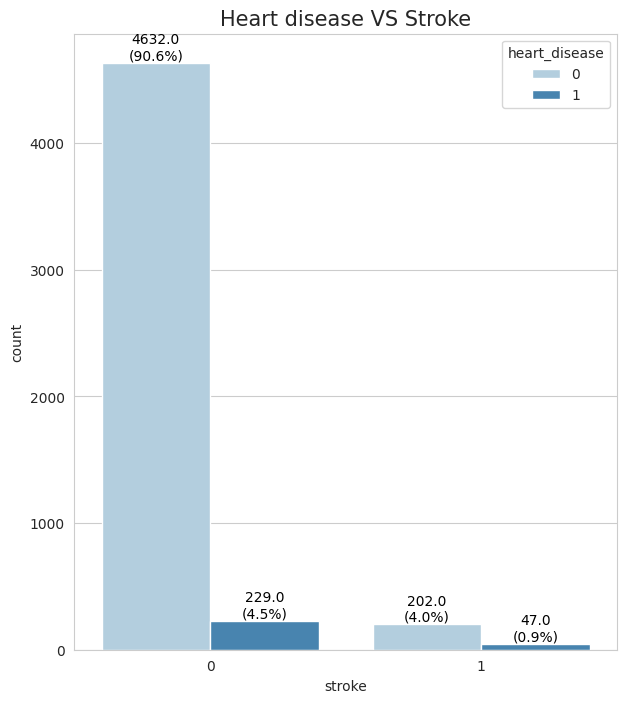

In [ ]:
sns.set_style('whitegrid')
countplt, ax = plt.subplots(figsize=(7, 8))
ax = sns.countplot(x=df['stroke'], hue=dataset['heart_disease'], palette='Blues')
total = len(df)
for p in ax.patches:
    count = p.get_height()
    if count > 0:
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

ax.set_title("Heart disease VS Stroke", fontsize=15)
plt.show()

## Bivariate Analysis

### Age Distribution by Stroke Occurrence

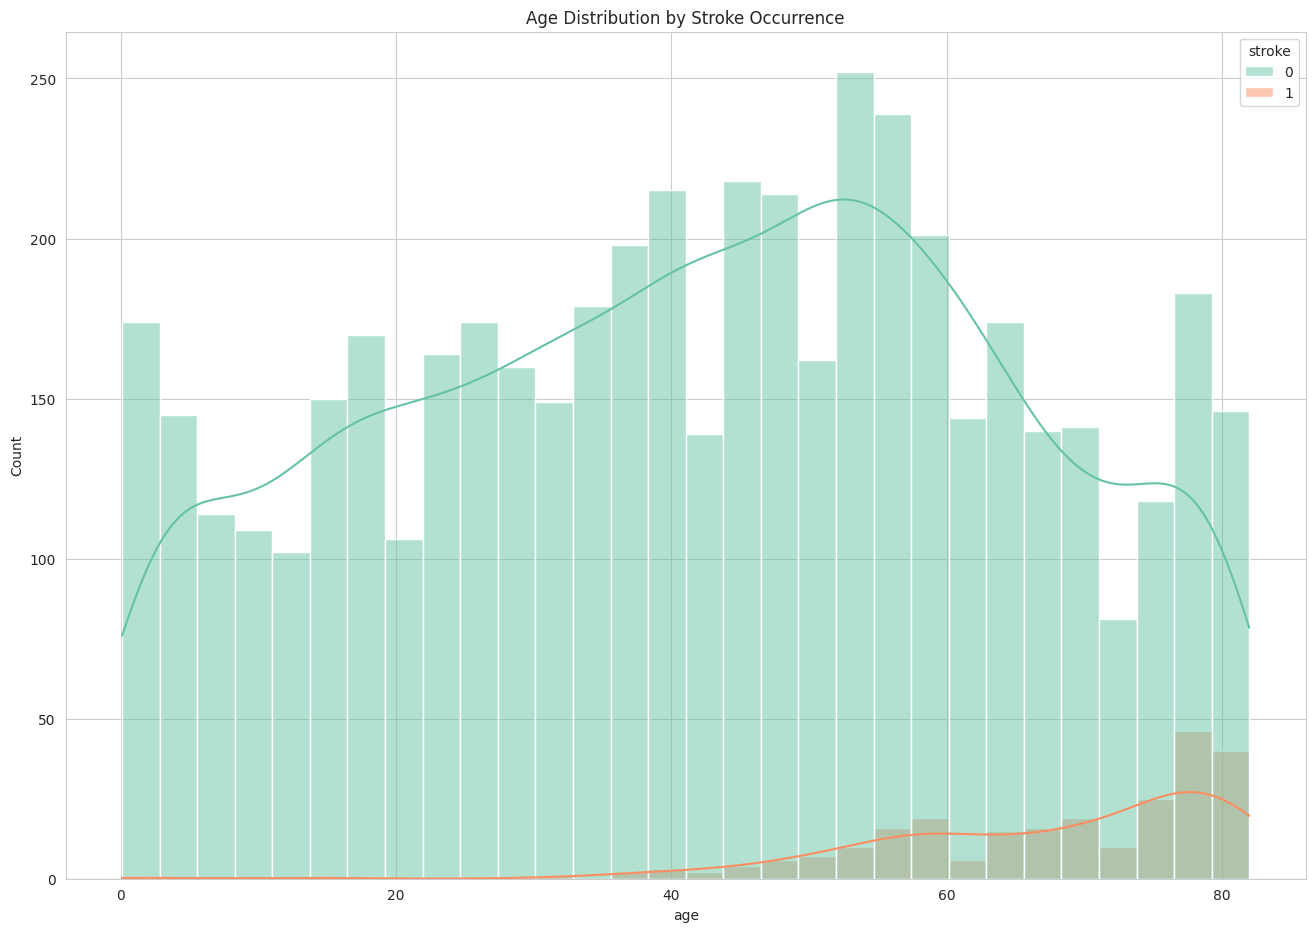

In [ ]:
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30, palette='Set2')
plt.title('Age Distribution by Stroke Occurrence')
plt.show()

### Average Glucose level Distribution by Stroke Occurrence

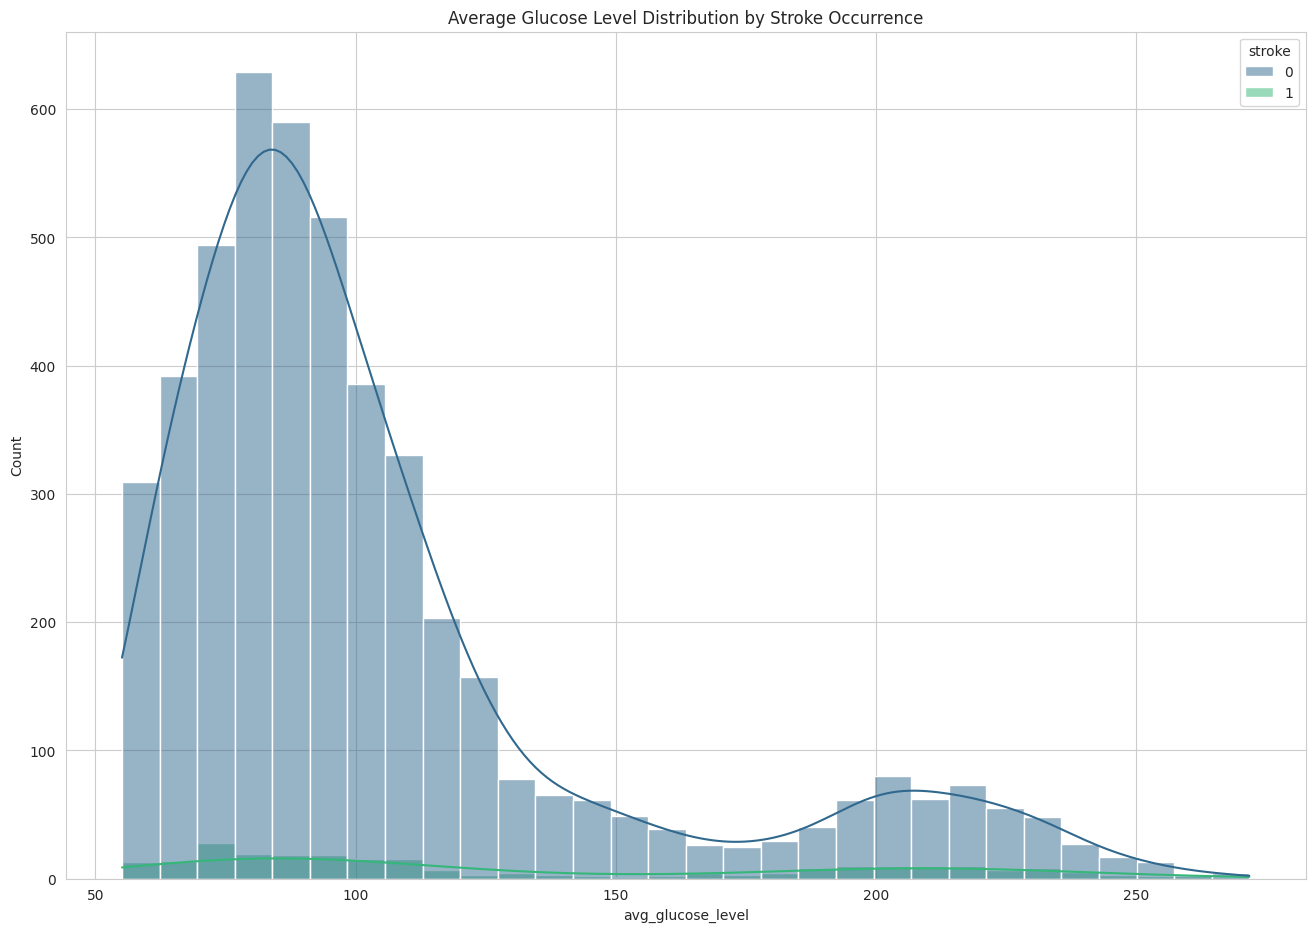

In [ ]:
sns.histplot(data=df, x='avg_glucose_level', hue='stroke', kde=True, bins=30, palette='viridis')
plt.title('Average Glucose Level Distribution by Stroke Occurrence')
plt.show()

### Heart Disease Distribution by Stroke Occurrence

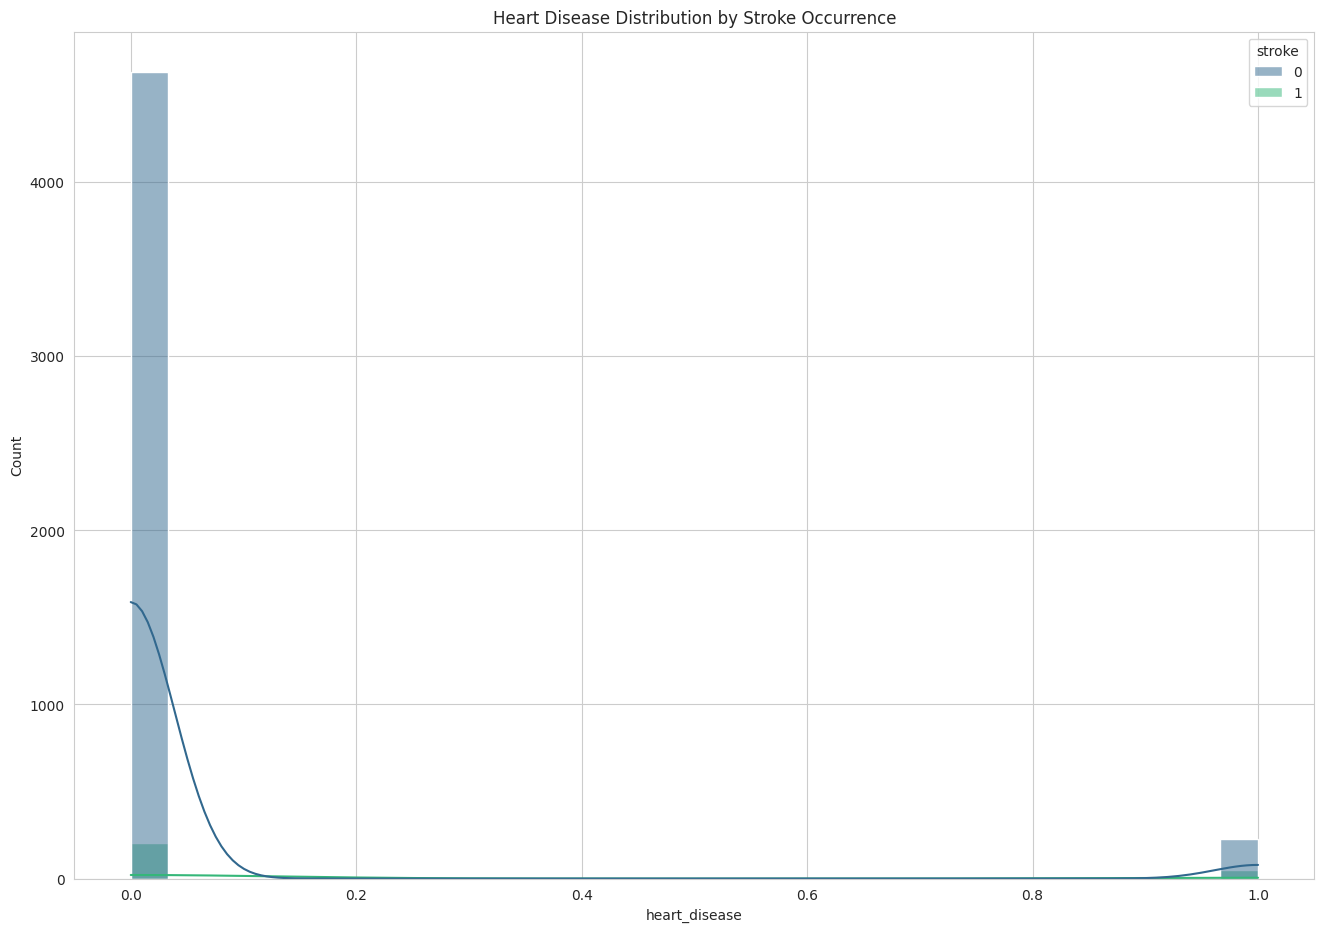

In [ ]:
sns.histplot(data=df, x='heart_disease', hue='stroke', kde=True, bins=30, palette='viridis')
plt.title('Heart Disease Distribution by Stroke Occurrence')
plt.show()

### Marriage Distribution by Stroke Occurrence

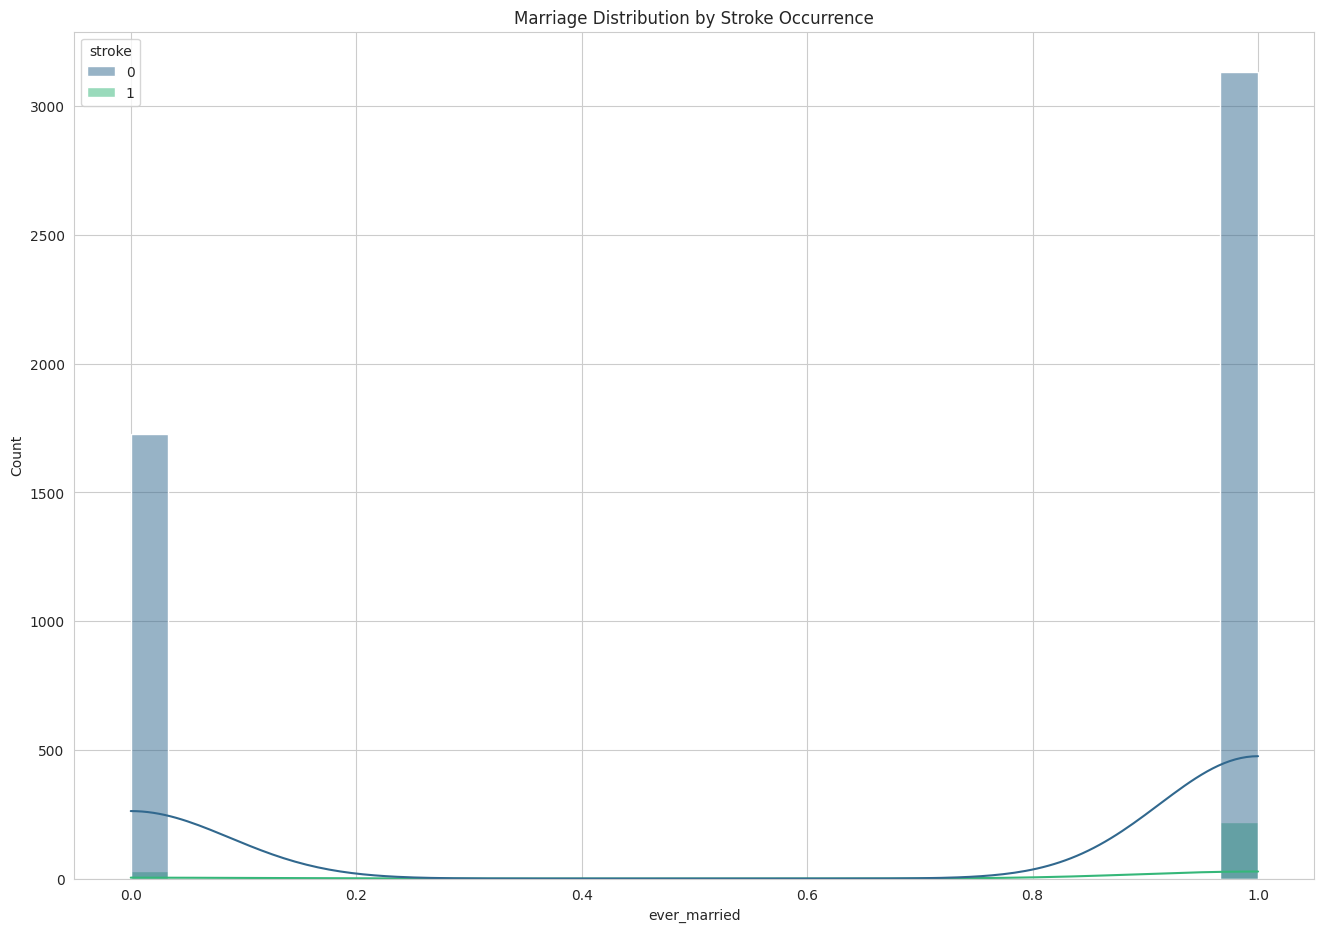

In [ ]:
sns.histplot(data=df, x='ever_married', hue='stroke', kde=True, bins=30, palette='viridis')
plt.title('Marriage Distribution by Stroke Occurrence')
plt.show()

### Hypertension Distribution by Stroke Occurrence

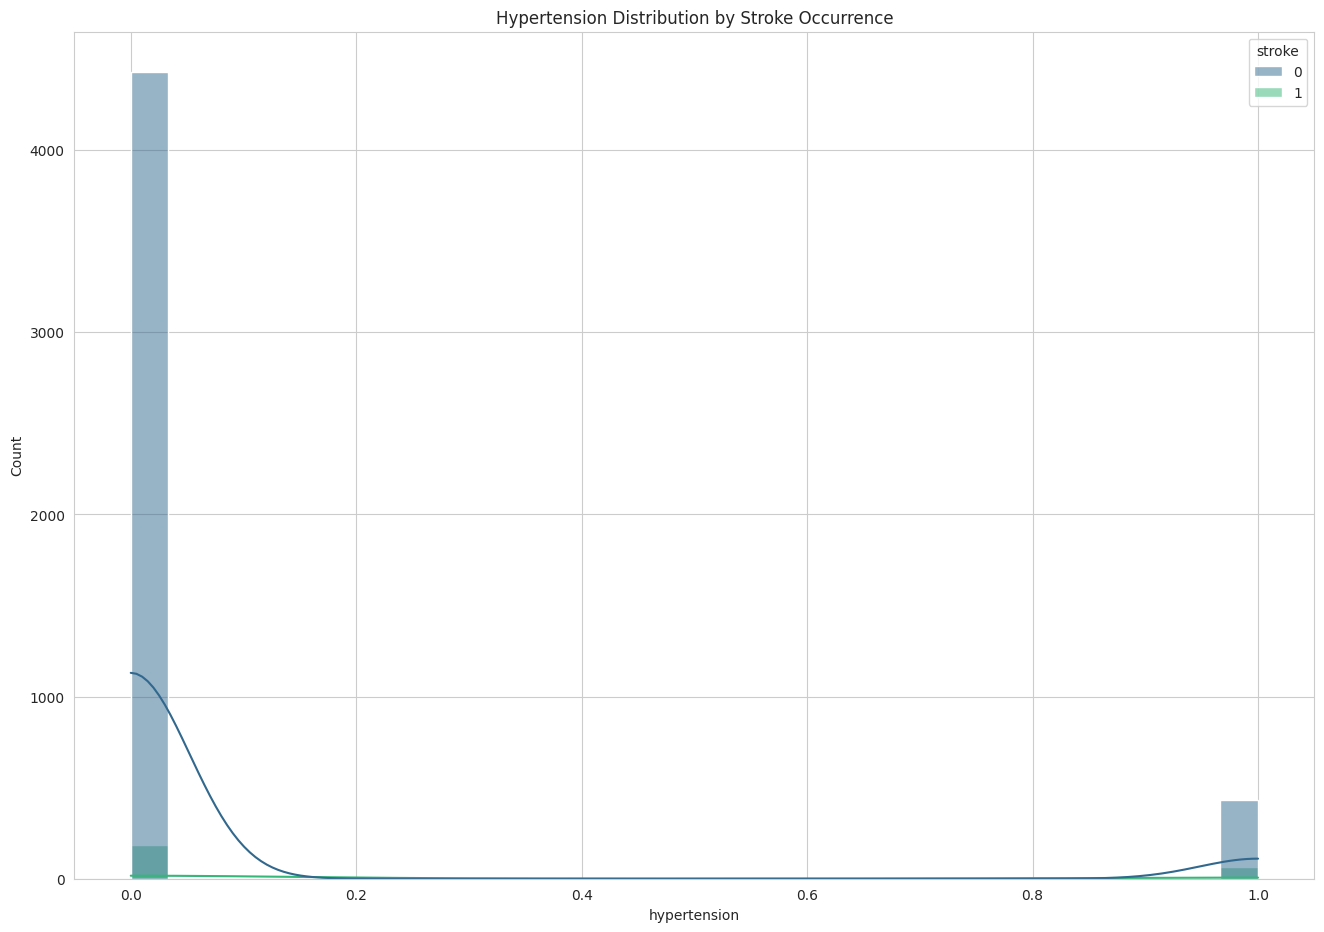

In [ ]:
sns.histplot(data=df, x='hypertension', hue='stroke', kde=True, bins=30, palette='viridis')
plt.title('Hypertension Distribution by Stroke Occurrence')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   gender                   5110 non-null   int64   
 1   age                      5110 non-null   float64 
 2   hypertension             5110 non-null   int64   
 3   heart_disease            5110 non-null   int64   
 4   ever_married             5110 non-null   int64   
 5   work_type                5110 non-null   int64   
 6   Residence_type           5110 non-null   int64   
 7   avg_glucose_level        5110 non-null   float64 
 8   bmi                      5110 non-null   float64 
 9   smoking_status           5110 non-null   int64   
 10  stroke                   5110 non-null   int64   
 11  age_group                5110 non-null   category
 12  avg_glucose_level_group  5110 non-null   category
dtypes: category(2), float64(3), int64(8)
memory usage: 449.7 KB


In [ ]:
categorical = ['age_group', 'avg_glucose_level_group']
numerical = ['age', 'hypertension', 'heart_disease','avg_glucose_level', 'bmi', 'gender' ,'ever_married','work_type','Residence_type','smoking_status', 'stroke']

In [ ]:
df[numerical].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   gender             5110 non-null   int64  
 6   ever_married       5110 non-null   int64  
 7   work_type          5110 non-null   int64  
 8   Residence_type     5110 non-null   int64  
 9   smoking_status     5110 non-null   int64  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 439.3 KB


In [ ]:
df2 = df[numerical]

# Machine Learning

In [ ]:
print((df2['stroke']).value_counts())

stroke
0    4861
1     249
Name: count, dtype: int64


## Split Data

In [ ]:
#split data
from sklearn.model_selection import train_test_split

# Separating features and target
X = df2.drop(columns=['stroke'])
y = df2['stroke']


# Direct split: train (60%), validation (20%), test (20%) with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)  # 60% train, 40% temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)  # 20% valid, 20% test

print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')

X_train shape: (3066, 10)
X_val shape: (1022, 10)
X_test shape: (1022, 10)


In [ ]:
y_train.value_counts()

,count
stroke,
0,2917
1,149


## Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print(f'X_resampled shape: {X_train_resampled.shape}')
print(f'y_resampled shape: {y_train_resampled.shape}')

X_resampled shape: (5834, 10)
y_resampled shape: (5834,)


## Scaling

In [ ]:
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

## Baseline (Dummy Classifier)

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score, precision_score, recall_score

# Inisialisasi DummyClassifier dengan strategi stratified
baseline_model = DummyClassifier(strategy="stratified")
baseline_model.fit(X_train_resampled, y_train_resampled)
baseline_model

DummyClassifier(strategy='stratified')

In [ ]:
# Predictions using the baseline model DummyClassifier on the training data
y_train_pred_baseline = baseline_model.predict(X_train_resampled)

# Probability predictions on the training data (for AUC-ROC)
y_train_pred_proba_baseline = baseline_model.predict_proba(X_train_resampled)[:, 1]

# Evaluating the baseline model on the training data
print("Classification Report of Baseline Model (DummyClassifier) on training data:\n", classification_report(y_train_resampled, y_train_pred_baseline, zero_division=0))
print("F1-Score of Baseline Model (DummyClassifier) on training data:", f1_score(y_train_resampled, y_train_pred_baseline, zero_division=0))
print("Precision of Baseline Model (DummyClassifier) on training data:", precision_score(y_train_resampled, y_train_pred_baseline, zero_division=0))
print("Recall of Baseline Model (DummyClassifier) on training data:", recall_score(y_train_resampled, y_train_pred_baseline, zero_division=0))
print("AUC-ROC of Baseline Model (DummyClassifier) on training data:", roc_auc_score(y_train_resampled, y_train_pred_proba_baseline))  # Using probabilities

Classification Report of Baseline Model (DummyClassifier) on training data:
               precision    recall  f1-score   support

           0       0.51      0.50      0.51      2917
           1       0.51      0.51      0.51      2917

    accuracy                           0.51      5834
   macro avg       0.51      0.51      0.51      5834
weighted avg       0.51      0.51      0.51      5834

F1-Score of Baseline Model (DummyClassifier) on training data: 0.5108269394714408
Precision of Baseline Model (DummyClassifier) on training data: 0.5081411126187245
Recall of Baseline Model (DummyClassifier) on training data: 0.5135413095646212
AUC-ROC of Baseline Model (DummyClassifier) on training data: 0.5018854988001371


In [ ]:
# Predictions using the baseline model DummyClassifier on the validation data
y_val_pred_baseline = baseline_model.predict(X_val)

# Probability predictions on the validation data (for AUC-ROC)
y_val_pred_proba_baseline = baseline_model.predict_proba(X_val)[:, 1]

# Evaluating the baseline model on the validation data
print("Classification Report of Baseline Model (DummyClassifier) on validation data:\n", classification_report(y_val, y_val_pred_baseline, zero_division=0))
print("F1-Score of Baseline Model (DummyClassifier) on validation data:", f1_score(y_val, y_val_pred_baseline, zero_division=0))
print("Precision of Baseline Model (DummyClassifier) on validation data:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall of Baseline Model (DummyClassifier) on validation data:", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("AUC-ROC of Baseline Model (DummyClassifier) on validation data:", roc_auc_score(y_val, y_val_pred_proba_baseline))  # Using probabilities

Classification Report of Baseline Model (DummyClassifier) on validation data:
               precision    recall  f1-score   support

           0       0.95      0.51      0.67       972
           1       0.05      0.46      0.08        50

    accuracy                           0.51      1022
   macro avg       0.50      0.49      0.37      1022
weighted avg       0.90      0.51      0.64      1022

F1-Score of Baseline Model (DummyClassifier) on validation data: 0.08409506398537477
Precision of Baseline Model (DummyClassifier) on validation data: 0.04627766599597585
Recall of Baseline Model (DummyClassifier) on validation data: 0.46
AUC-ROC of Baseline Model (DummyClassifier) on validation data: 0.45662551440329213


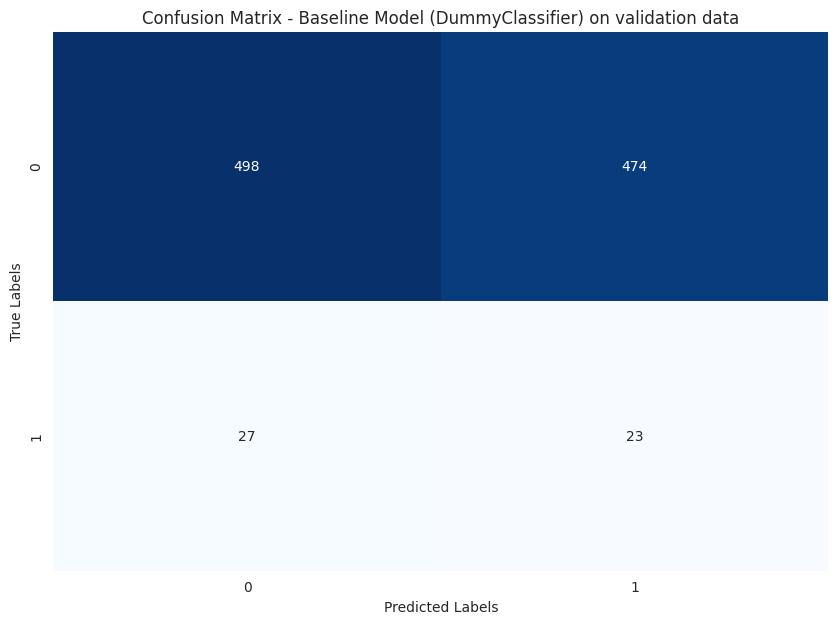

In [ ]:
# Confusion Matrix
cm_baseline = confusion_matrix(y_val, y_val_pred_baseline)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_baseline, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Baseline Model (DummyClassifier) on validation data')
plt.show()

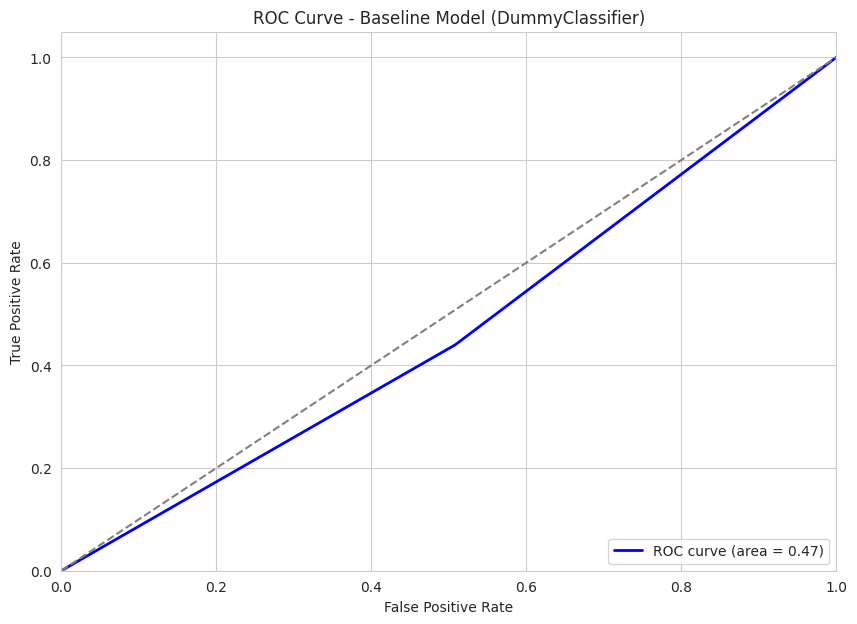

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities from the baseline model
y_val_prob_baseline = baseline_model.predict_proba(X_val)[:, 1]

# Calculate the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_val_prob_baseline)
roc_auc_baseline_val = auc(fpr, tpr)

# Visualize the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_baseline_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Plot diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Baseline Model (DummyClassifier)')
plt.legend(loc="lower right")
plt.show()

## Logistic Regression

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train_resampled), y=y_train_resampled)
class_weights_dict = {i: class_weights[i] for i in range(len(class_weights))}

In [ ]:
logreg = LogisticRegression()

# Parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [ ]:
# Grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='f1')

In [ ]:
# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
logreg = LogisticRegression(
    C=best_params['C'],
    penalty=best_params['penalty'],
    solver=best_params['solver'],
    max_iter=1000,
    class_weight='balanced'
)
logreg.fit(X_train_resampled, y_train_resampled)




LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000, penalty='l1',
                   solver='liblinear')

In [ ]:
from sklearn.metrics import f1_score, precision_recall_curve

y_prob = logreg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Cari threshold dengan F1-score terbaik
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

y_pred_adjusted = (y_prob >= optimal_threshold).astype(int)
print("Adjusted F1-Score:", f1_score(y_test, y_pred_adjusted))

Adjusted F1-Score: 0.0


In [ ]:
y_train_pred = logreg.predict(X_train_resampled)
y_train_pred_proba = logreg.predict_proba(X_train_resampled)[:, 1]
print("Classification Report (Training):\n", classification_report(y_train_resampled, y_train_pred))
print("F1-Score (Training):", f1_score(y_train_resampled, y_train_pred))
print("Precision (Training):", precision_score(y_train_resampled, y_train_pred))
print("Recall (Training):", recall_score(y_train_resampled, y_train_pred))
print("AUC-ROC (Training):", roc_auc_score(y_train_resampled, y_train_pred_proba))

Classification Report (Training):
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      2917
           1       0.78      0.87      0.82      2917

    accuracy                           0.81      5834
   macro avg       0.82      0.81      0.81      5834
weighted avg       0.82      0.81      0.81      5834

F1-Score (Training): 0.8236820762368208
Precision (Training): 0.7817118226600985
Recall (Training): 0.8704148097360301
AUC-ROC (Training): 0.8988447257920511


In [ ]:
# Evaluate on Validation Data
y_val_pred = logreg.predict(X_val)
y_val_pred_proba = logreg.predict_proba(X_val)[:, 1]
print("Classification Report (Validation):\n", classification_report(y_val, y_val_pred))
print("F1-Score (Validation):", f1_score(y_val, y_val_pred))
print("Precision (Validation):", precision_score(y_val, y_val_pred))
print("Recall (Validation):", recall_score(y_val, y_val_pred))
print("AUC-ROC (Validation):", roc_auc_score(y_val, y_val_pred_proba))

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       972
           1       0.05      1.00      0.09        50

    accuracy                           0.05      1022
   macro avg       0.02      0.50      0.05      1022
weighted avg       0.00      0.05      0.00      1022

F1-Score (Validation): 0.09328358208955224
Precision (Validation): 0.04892367906066536
Recall (Validation): 1.0
AUC-ROC (Validation): 0.5545267489711934


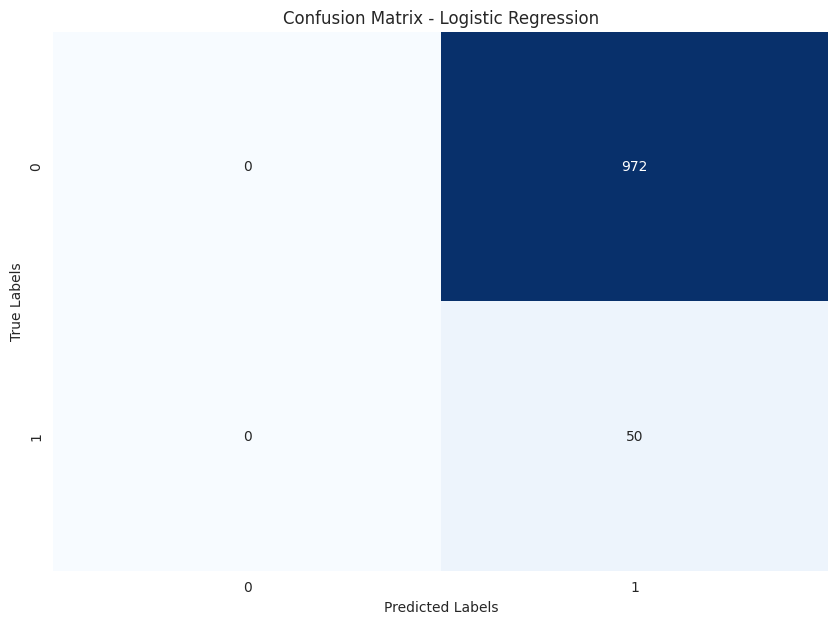

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Confusion Matrix
cm_logreg = confusion_matrix(y_val, y_val_pred)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

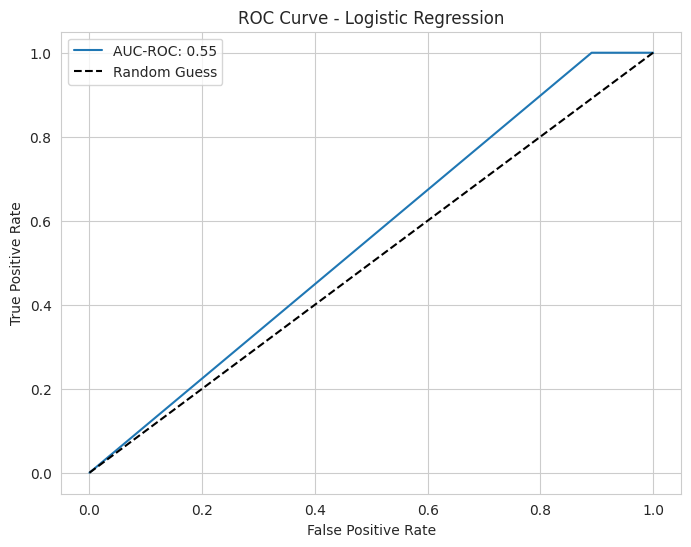

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC Curve for Validation Data
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC: {roc_auc_score(y_val, y_val_pred_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


## Decision Tree

In [ ]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}


In [ ]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}


In [ ]:
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=30,
    min_samples_split=2
)
dt_model.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(max_depth=30)

In [ ]:
y_train_pred_dt = dt_model.predict(X_train_resampled)

In [ ]:
# Probability predictions on the training data (for AUC-ROC)
# Use X_train_resampled instead of X_train
y_train_pred_proba_dt = grid_search.best_estimator_.predict_proba(X_train_resampled)[:, 1]

# Evaluate the Decision Tree model on the training data
print("Classification Report for Decision Tree on the training data:\n", classification_report(y_train_resampled, y_train_pred_dt))
print("F1-Score for Decision Tree on the training data:", f1_score(y_train_resampled, y_train_pred_dt))
print("Precision for Decision Tree model on the training data:", precision_score(y_train_resampled, y_train_pred_dt))
print("Recall for Decision Tree model on the training data:", recall_score(y_train_resampled, y_train_pred_dt))
print("AUC-ROC for Decision Tree on the training data:", roc_auc_score(y_train_resampled, y_train_pred_proba_dt))  # Using probabilities

Classification Report for Decision Tree on the training data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2917
           1       1.00      1.00      1.00      2917

    accuracy                           1.00      5834
   macro avg       1.00      1.00      1.00      5834
weighted avg       1.00      1.00      1.00      5834

F1-Score for Decision Tree on the training data: 1.0
Precision for Decision Tree model on the training data: 1.0
Recall for Decision Tree model on the training data: 1.0
AUC-ROC for Decision Tree on the training data: 1.0


In [ ]:
# Predictions using the Logistic Regression model on the validation data
y_val_pred_dt = dt_model.predict(X_val)

In [ ]:
# Probability predictions on the validation data (for AUC-ROC)
y_val_pred_proba_dt = dt_model.predict_proba(X_val)[:, 1] # Changed dt to dt_model

# Evaluate the Decision Tree model on the validation data
print("Classification Report for Decision Tree on the validation data:\n", classification_report(y_val, y_val_pred_dt))
print("F1-Score for Decision Tree on the validation data:", f1_score(y_val, y_val_pred_dt))
print("Precision for Decision Tree model on the validation data:", precision_score(y_val, y_val_pred_dt))
print("Recall for Decision Tree model on the validation data:", recall_score(y_val, y_val_pred_dt))
print("AUC-ROC for Decision Tree on the validation data:", roc_auc_score(y_val, y_val_pred_proba_dt))  # Using probabilities

Classification Report for Decision Tree on the validation data:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       972
           1       0.05      0.26      0.09        50

    accuracy                           0.74      1022
   macro avg       0.50      0.51      0.47      1022
weighted avg       0.91      0.74      0.81      1022

F1-Score for Decision Tree on the validation data: 0.08934707903780069
Precision for Decision Tree model on the validation data: 0.05394190871369295
Recall for Decision Tree model on the validation data: 0.26
AUC-ROC for Decision Tree on the validation data: 0.5127160493827161


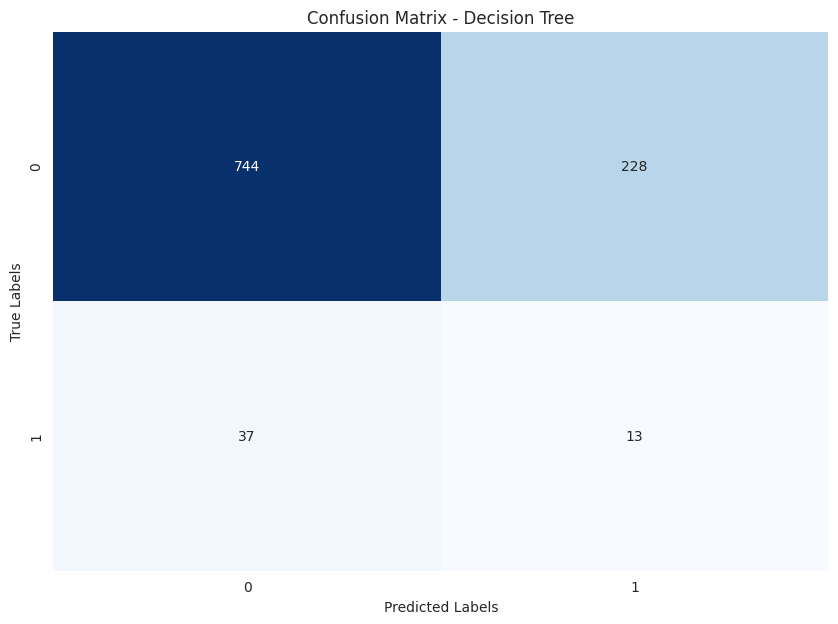

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the Confusion Matrix
cm_dt = confusion_matrix(y_val, y_val_pred_dt)

# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

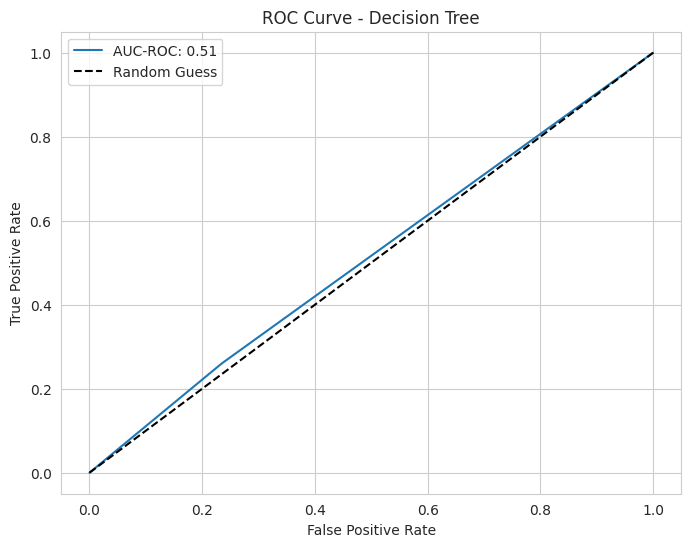

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC Curve for Validation Data
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred_dt)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC-ROC: {roc_auc_score(y_val, y_val_pred_dt):.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()

## SVM

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Parameter grid untuk RandomizedSearchCV
param_dist_svm = {
    'C': uniform(0.1, 10),  # Rentang nilai untuk parameter C
    'kernel': ['linear', 'rbf', 'poly'],  # Pilihan kernel tetap sama
    'gamma': ['scale', 'auto']           # Gamma tetap sama
}

In [ ]:
# RandomizedSearchCV untuk SVM
random_search_svm = RandomizedSearchCV(
    estimator=SVC(probability=True),
    param_distributions=param_dist_svm,
    n_iter=20,  # Jumlah kombinasi yang akan diuji
    cv=5,       # 5-fold cross-validation
    scoring='recall',  # Fokus pada skor recall
    random_state=42,   # Untuk hasil yang dapat direproduksi
    n_jobs=-1
)

# Latih model menggunakan RandomizedSearchCV
random_search_svm.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True), n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78e410a7cb20>,
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'poly']},
                   random_state=42, scoring='recall')

In [ ]:
print("Best Hyperparameters:", random_search_svm.best_params_)

Best Hyperparameters: {'C': 9.588855372533333, 'gamma': 'auto', 'kernel': 'rbf'}


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, f1_score)

# Create and train the SVM model with class_weight
svm_model = SVC(C=0.1, gamma='auto', kernel='rbf', class_weight='balanced', probability=True, random_state=42)

# Melatih model menggunakan data pelatihan
svm_model.fit(X_train_resampled, y_train_resampled)
svm_model

SVC(C=0.1, class_weight='balanced', gamma='auto', probability=True,
    random_state=42)

In [ ]:
y_train_pred_svm = svm_model.predict(X_train_resampled)

In [ ]:
# Predict probabilities on the training data (for AUC-ROC)
y_train_pred_proba_svm = svm_model.predict_proba(X_train_resampled)[:, 1]

# Evaluate the SVM model on the training data
print("Classification Report SVM on training data:\n", classification_report(y_train_resampled, y_train_pred_svm))
print("F1-Score SVM on training data:", f1_score(y_train_resampled, y_train_pred_svm))
print("Precision SVM on training data:", precision_score(y_train_resampled, y_train_pred_svm))
print("Recall SVM on training data:", recall_score(y_train_resampled, y_train_pred_svm))
print("AUC-ROC SVM on training data:", roc_auc_score(y_train_resampled, y_train_pred_proba_svm))  # Using probabilities

Classification Report SVM on training data:
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      2917
           1       0.83      0.92      0.87      2917

    accuracy                           0.87      5834
   macro avg       0.87      0.87      0.87      5834
weighted avg       0.87      0.87      0.87      5834

F1-Score SVM on training data: 0.8747152619589977
Precision SVM on training data: 0.8324558686899969
Recall SVM on training data: 0.9214946863215633
AUC-ROC SVM on training data: 0.935852083626899


model evaluation svm

In [ ]:
# Predict using the model on the validation set
y_val_pred_svm = svm_model.predict(X_val)

In [ ]:
# Predict probabilities on the validation set (for AUC-ROC)
y_val_pred_proba_svm = svm_model.predict_proba(X_val)[:, 1]


# Evaluate the SVM model on the validation data
print("Classification Report SVM on validation data:\n", classification_report(y_val, y_val_pred_svm))
print("F1-Score SVM on validation data:", f1_score(y_val, y_val_pred_svm))
print("Precision SVM on validation data:", precision_score(y_val, y_val_pred_svm))
print("Recall SVM on validation data:", recall_score(y_val, y_val_pred_svm))
print("AUC-ROC SVM on validation data:", roc_auc_score(y_val, y_val_pred_proba_svm))  # Using probabilities

Classification Report SVM on validation data:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

F1-Score SVM on validation data: 0.0
Precision SVM on validation data: 0.0
Recall SVM on validation data: 0.0
AUC-ROC SVM on validation data: 0.5


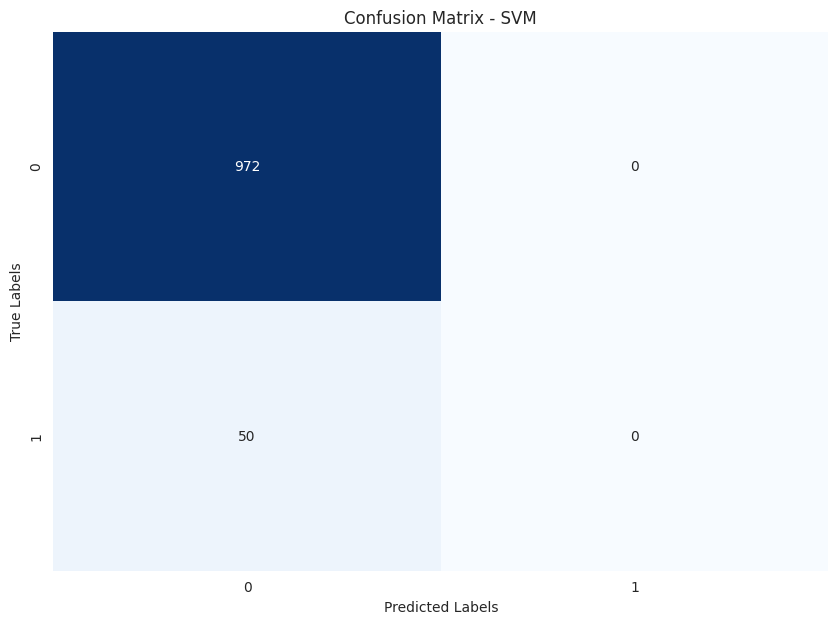

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Confusion Matrix
cm_svm = confusion_matrix(y_val, y_val_pred_svm)

# Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()

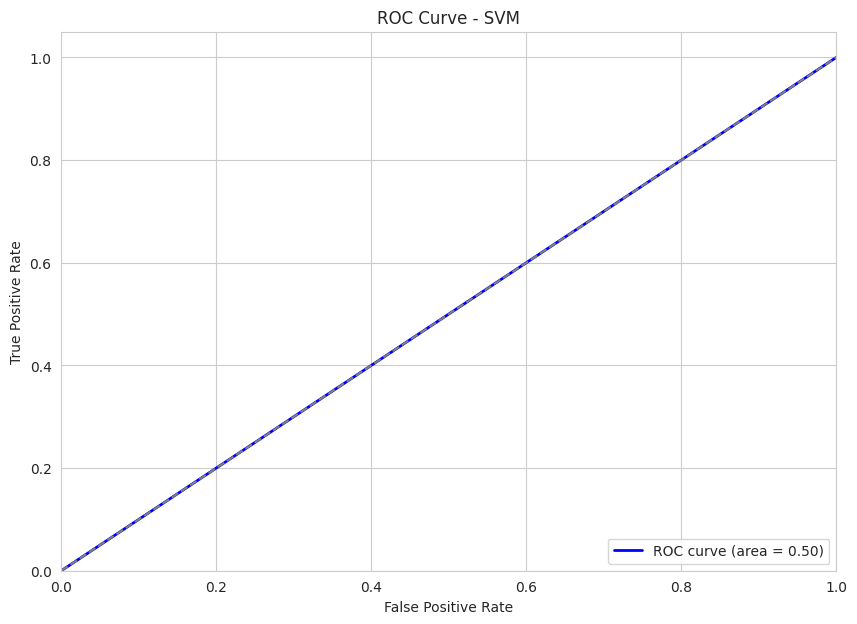

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the ROC curve
y_val_prob_svm = svm_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr_svm, tpr_svm, _ = roc_curve(y_val, y_val_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Visualize ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.show()


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(100, 500),  # Random integers between 100 and 500
    'max_depth': [None, 10, 20],        # Include None for unlimited depth
    'min_samples_split': randint(2, 20)  # Random integers between 2 and 20
}

# RandomizedSearchCV setup
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist_rf,
    n_iter=20,  # Number of random combinations to try
    cv=5,       # 5-fold cross-validation
    scoring='recall',  # Optimize for recall
    random_state=42,
    n_jobs=-1  # Use all available processors
)

# Fit the RandomForestClassifier
rf_random.fit(X_train_resampled, y_train_resampled)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78e3ff186800>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78e418b90400>},
                   random_state=42, scoring='recall')

In [ ]:
print("Best Hyperparameters for Random Forest:", rf_random.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 413}


In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=413, class_weight='balanced', random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
rf_model

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=413,
                       random_state=42)

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, f1_score, precision_score, recall_score
# Predict classes on training data
y_train_pred_rf = rf_model.predict(X_train_resampled)

In [ ]:
# Predict probabilities on training data (probability for class 1)
y_train_pred_proba_rf = rf_model.predict_proba(X_train_resampled)[:, 1]

# Evaluate the Random Forest model on training data
print("Classification Report for Random Forest on training data:\n", classification_report(y_train_resampled, y_train_pred_rf))
print("F1-Score for Random Forest on training data:", f1_score(y_train_resampled, y_train_pred_rf))
print("Precision for Random Forest model on training data:", precision_score(y_train_resampled, y_train_pred_rf))
print("Recall for Random Forest model on training data:", recall_score(y_train_resampled, y_train_pred_rf))
print("AUC-ROC for Random Forest on training data:", roc_auc_score(y_train_resampled, y_train_pred_proba_rf))  # Using probabilities

Classification Report for Random Forest on training data:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95      2917
           1       0.92      1.00      0.96      2917

    accuracy                           0.96      5834
   macro avg       0.96      0.96      0.96      5834
weighted avg       0.96      0.96      0.96      5834

F1-Score for Random Forest on training data: 0.9574083209998355
Precision for Random Forest model on training data: 0.9200379266750948
Recall for Random Forest model on training data: 0.9979430922180322
AUC-ROC for Random Forest on training data: 0.9931123793012225


In [ ]:
# Predict the model on the validation set
y_val_pred_rf = rf_model.predict(X_val)

In [ ]:
# Predict probabilities on the validation set (for AUC-ROC)
y_val_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]

# Evaluate the Random Forest model on the validation data
print("Classification Report for Random Forest on validation data:\n", classification_report(y_val, y_val_pred_rf))
print("F1-Score for Random Forest on validation data:", f1_score(y_val, y_val_pred_rf))
print("Precision for Random Forest model on validation data:", precision_score(y_val, y_val_pred_rf))
print("Recall for Random Forest model on validation data:", recall_score(y_val, y_val_pred_rf))
print("AUC-ROC for Random Forest on validation data:", roc_auc_score(y_val, y_val_pred_proba_rf))  # Using probabilities

Classification Report for Random Forest on validation data:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       972
           1       0.05      0.02      0.03        50

    accuracy                           0.93      1022
   macro avg       0.50      0.50      0.50      1022
weighted avg       0.91      0.93      0.92      1022

F1-Score for Random Forest on validation data: 0.027777777777777776
Precision for Random Forest model on validation data: 0.045454545454545456
Recall for Random Forest model on validation data: 0.02
AUC-ROC for Random Forest on validation data: 0.49640946502057615


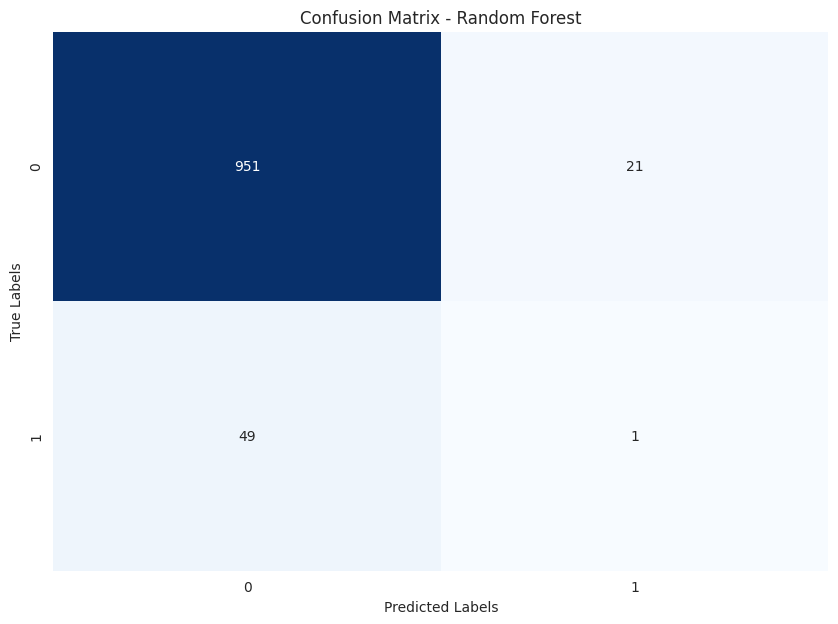

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung Confusion Matrix
cm_rf_val = confusion_matrix(y_val, y_val_pred_rf)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf_val, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')
plt.show()


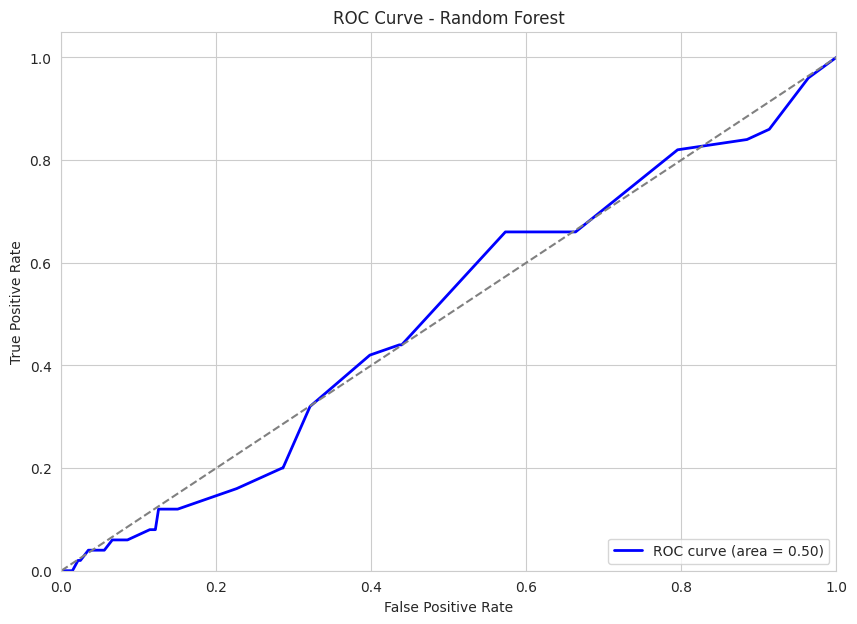

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the ROC curve
y_val_prob_rf = rf_model.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_val_prob_rf)
roc_auc_rf_val = auc(fpr_rf, tpr_rf)

# Visualize the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf_val:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


## Best Model on Train data

In [ ]:
import pandas as pd

# Performance metrics data
data_train = {
    'Metric': ['F1-Score', 'Precision', 'Recall', 'AUC-ROC'],
    'Dummy Classifier': [
        f1_score(y_train_resampled, y_train_pred_baseline, zero_division=0),
        precision_score(y_train_resampled, y_train_pred_baseline, zero_division=0),
        recall_score(y_train_resampled, y_train_pred_baseline, zero_division=0),
        roc_auc_score(y_train_resampled, y_train_pred_proba_baseline)
    ],
    'Logistic Regression': [
        f1_score(y_train_resampled, y_train_pred),
        precision_score(y_train_resampled, y_train_pred),
        recall_score(y_train_resampled, y_train_pred),
        roc_auc_score(y_train_resampled, y_train_pred_proba)
    ],
    'Decision Tree': [
        f1_score(y_train_resampled, y_train_pred_dt),
        precision_score(y_train_resampled, y_train_pred_dt),
        recall_score(y_train_resampled, y_train_pred_dt),
        roc_auc_score(y_train_resampled, y_train_pred_proba_dt)
    ],
    'SVM': [
        f1_score(y_train_resampled, y_train_pred_svm),
        precision_score(y_train_resampled, y_train_pred_svm),
        recall_score(y_train_resampled, y_train_pred_svm),
        roc_auc_score(y_train_resampled, y_train_pred_proba_svm)
    ],
    'Random Forest': [
        f1_score(y_train_resampled, y_train_pred_rf),
        precision_score(y_train_resampled, y_train_pred_rf),
        recall_score(y_train_resampled, y_train_pred_rf),
        roc_auc_score(y_train_resampled, y_train_pred_proba_rf)
    ],
}

# Creating DataFrame
df_metrics = pd.DataFrame(data_train)

# Displaying the table
df_metrics

,Metric,Dummy Classifier,Logistic Regression,Decision Tree,SVM,Random Forest
0,F1-Score,0.510827,0.823682,1.0,0.874715,0.957408
1,Precision,0.508141,0.781712,1.0,0.832456,0.920038
2,Recall,0.513541,0.870415,1.0,0.921495,0.997943
3,AUC-ROC,0.501885,0.898845,1.0,0.935852,0.993112


## Best Model on Validation Data

In [ ]:
import pandas as pd

# Performance metrics data
data_val = {
    'Metric': ['F1-Score', 'Precision', 'Recall', 'AUC-ROC'],
    'Dummy Classifier': [
        f1_score(y_val, y_val_pred_baseline, zero_division=0),
        precision_score(y_val, y_val_pred_baseline, zero_division=0),
        recall_score(y_val, y_val_pred_baseline, zero_division=0),
        roc_auc_score(y_val, y_val_pred_proba_baseline)
    ],
    'Logistic Regression': [
        f1_score(y_val, y_val_pred),
        precision_score(y_val, y_val_pred),
        recall_score(y_val, y_val_pred),
        roc_auc_score(y_val, y_val_pred_proba)
    ],
    'Decision Tree': [
        f1_score(y_val, y_val_pred_dt),
        precision_score(y_val, y_val_pred_dt),
        recall_score(y_val, y_val_pred_dt),
        roc_auc_score(y_val, y_val_pred_proba_dt)
    ],
    'SVM': [
        f1_score(y_val, y_val_pred_svm),
        precision_score(y_val, y_val_pred_svm),
        recall_score(y_val, y_val_pred_svm),
        roc_auc_score(y_val, y_val_pred_proba_svm)
    ],
    'Random Forest': [
        f1_score(y_val, y_val_pred_rf),
        precision_score(y_val, y_val_pred_rf),
        recall_score(y_val, y_val_pred_rf),
        roc_auc_score(y_val, y_val_pred_proba_rf)
    ],
}

# Creating DataFrame
df_metrics_val = pd.DataFrame(data_val)

# Displaying the table
df_metrics_val


,Metric,Dummy Classifier,Logistic Regression,Decision Tree,SVM,Random Forest
0,F1-Score,0.084095,0.093284,0.089347,0.0,0.027778
1,Precision,0.046278,0.048924,0.053942,0.0,0.045455
2,Recall,0.460000,1.000000,0.260000,0.0,0.020000
3,AUC-ROC,0.456626,0.554527,0.512716,0.5,0.496409


# Best Model : Logistic Rgression

In [ ]:
# Predictions on the test set
y_test_pred = logreg.predict(X_test) # Added this line

# Get predicted probabilities from the Logistic Regression
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probability of class 1

# Predict probabilities on the test set using Logistic Regression (for AUC-ROC)
y_test_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Predict probabilities on the test set (for AUC-ROC) using Random Forest
y_test_pred_proba = logreg.predict_proba(X_test)[:, 1]

# Evaluate the Logistic Regression model on the test data (Corrected the model name in the print statements)
print("Classification Report for Logistic Regression on the test data:\n", classification_report(y_test, y_test_pred))
print("Accuracy of Logistic Regression on the test data:", accuracy_score(y_test, y_test_pred))
print("AUC-ROC for Logistic Regression on the test data:", roc_auc_score(y_test, y_test_pred_proba))  # Using probabilities
print("F1-Score for Logistic Regression on the test data:", f1_score(y_test, y_test_pred))
print("Precision of Logistic Regression on the test data:", precision_score(y_test, y_test_pred))
print("Recall of Logistic Regression on the test data:", recall_score(y_test, y_test_pred))

Classification Report for Logistic Regression on the test data:
               precision    recall  f1-score   support

           0       0.97      0.75      0.85       972
           1       0.11      0.60      0.18        50

    accuracy                           0.74      1022
   macro avg       0.54      0.67      0.51      1022
weighted avg       0.93      0.74      0.81      1022

Accuracy of Logistic Regression on the test data: 0.7397260273972602
AUC-ROC for Logistic Regression on the test data: 0.7469341563786008
F1-Score for Logistic Regression on the test data: 0.18404907975460122
Precision of Logistic Regression on the test data: 0.10869565217391304
Recall of Logistic Regression on the test data: 0.6


Better than Random Forest

In [ ]:
# Predictions on the test set using Random Forest
y_test_pred_rf = rf_model.predict(X_test)

# Get predicted probabilities from the Random Forest model
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Predict probabilities on the test set using Random Forest (for AUC-ROC)
y_test_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the Random Forest model on the test data
print("Classification Report for Random Forest on the test data:\n", classification_report(y_test, y_test_pred_rf))
print("Accuracy of Random Forest on the test data:", accuracy_score(y_test, y_test_pred_rf))
print("AUC-ROC for Random Forest on the test data:", roc_auc_score(y_test, y_test_pred_proba_rf))  # Using probabilities
print("F1-Score for Random Forest on the test data:", f1_score(y_test, y_test_pred_rf))
print("Precision of Random Forest on the test data:", precision_score(y_test, y_test_pred_rf))
print("Recall of Random Forest on the test data:", recall_score(y_test, y_test_pred_rf))

Classification Report for Random Forest on the test data:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91       972
           1       0.08      0.24      0.12        50

    accuracy                           0.84      1022
   macro avg       0.52      0.55      0.52      1022
weighted avg       0.91      0.84      0.87      1022

Accuracy of Random Forest on the test data: 0.8356164383561644
AUC-ROC for Random Forest on the test data: 0.707119341563786
F1-Score for Random Forest on the test data: 0.125
Precision of Random Forest on the test data: 0.08450704225352113
Recall of Random Forest on the test data: 0.24


In [ ]:
import pandas as pd

# Performance metrics data
data_test = {
    'Metric': ['F1-Score', 'Precision', 'Recall', 'AUC-ROC'],
    'Logistic Regression': [
        f1_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        roc_auc_score(y_test, y_test_pred_proba)
    ],
    'Random Forest': [
        f1_score(y_val, y_val_pred_rf),
        precision_score(y_val, y_val_pred_rf),
        recall_score(y_val, y_val_pred_rf),
        roc_auc_score(y_val, y_val_pred_proba_rf)
    ],
}

# Creating DataFrame
df_metrics_test = pd.DataFrame(data_test)

# Displaying the table
df_metrics_test

,Metric,Logistic Regression,Random Forest
0,F1-Score,0.184049,0.027778
1,Precision,0.108696,0.045455
2,Recall,0.600000,0.020000
3,AUC-ROC,0.746934,0.496409


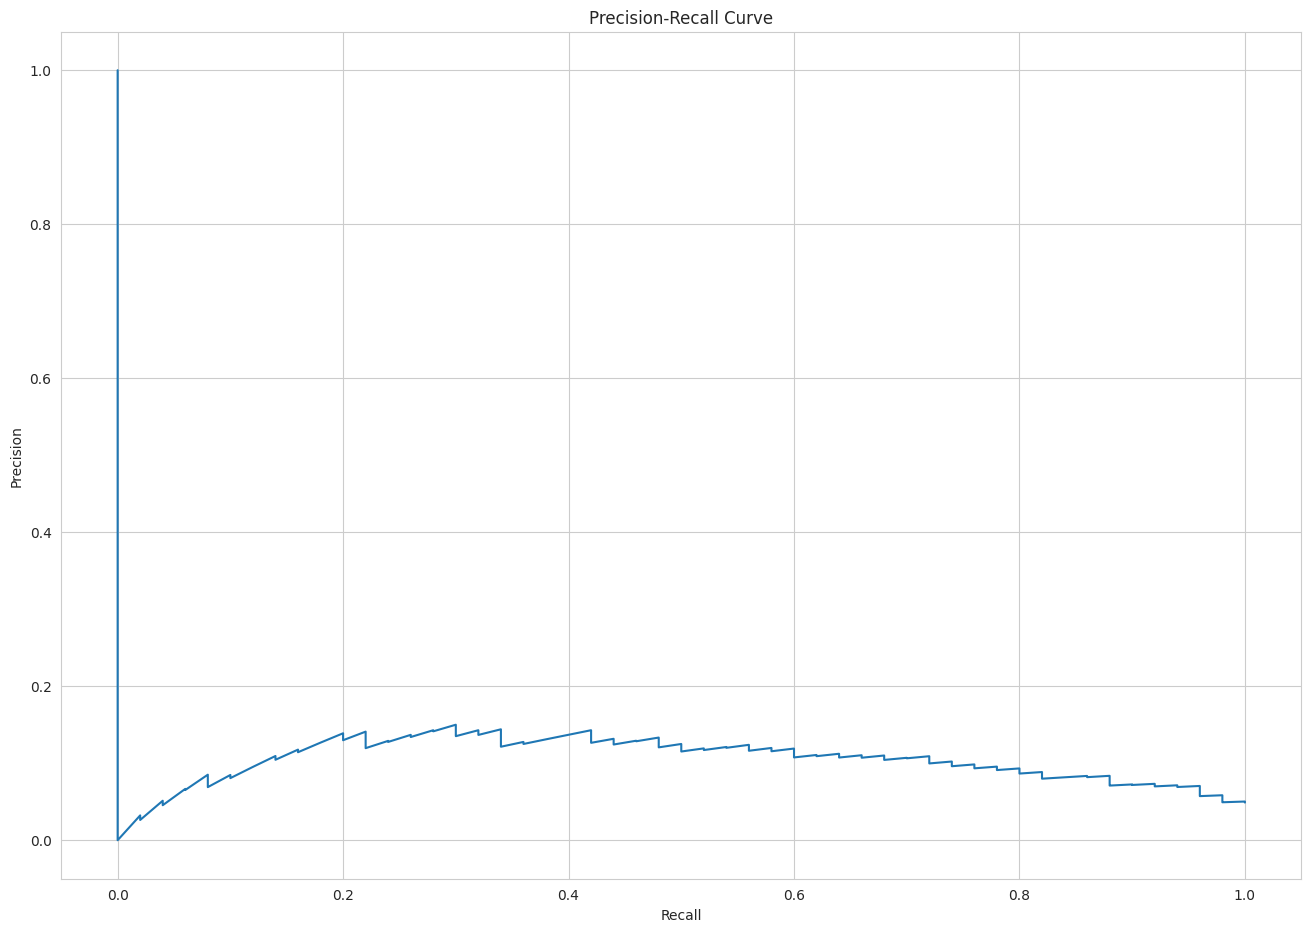

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_probs = logreg.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

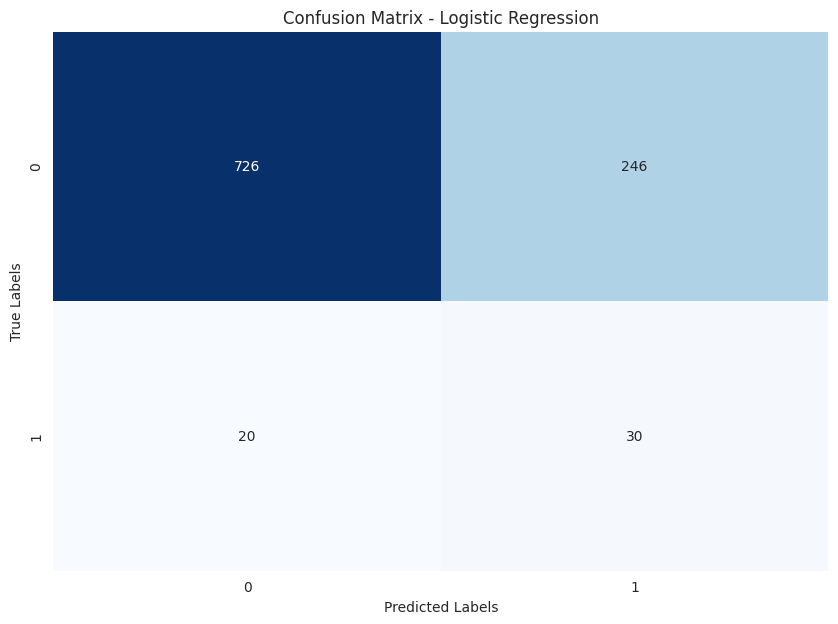

In [ ]:
# Calculate confusion matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Visualize confusion matrix for Logistic Regression
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)

# Add labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

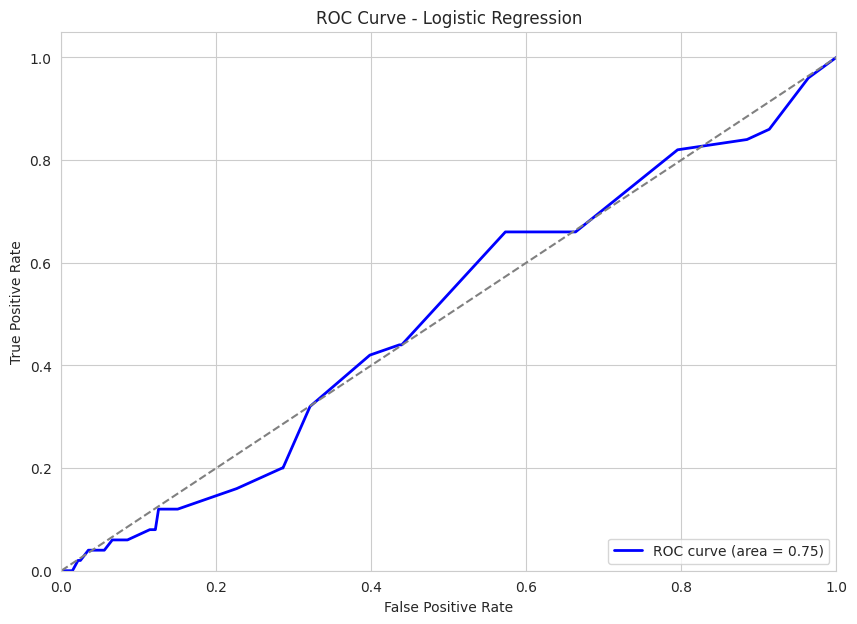

AUC-ROC Logistic Regression on test data: 0.75


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate predicted probabilities for the ROC curve from the Logistic Regression model
y_test_pred_proba_logreg = logreg.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_pred_proba_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Visualize the ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_logreg:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Display the AUC value
print(f"AUC-ROC Logistic Regression on test data: {roc_auc_logreg:.2f}")

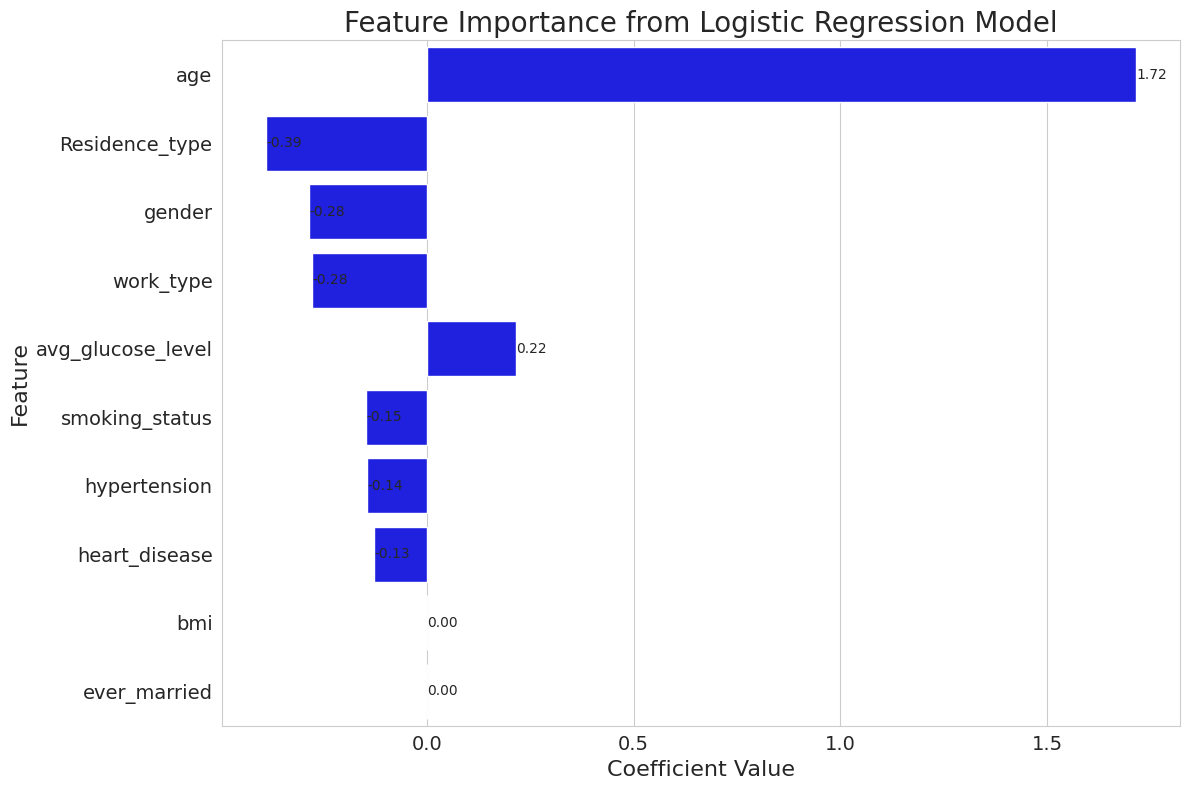

In [ ]:
# Calculate and display feature importance using coefficients
feature_importance = logreg.coef_[0]  # Get coefficients for the first class (assuming binary classification)

# Create a DataFrame to display feature importance
# Use X.columns to get the feature names from the original DataFrame
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort features by absolute importance from highest to lowest
importance_df['Absolute_Importance'] = importance_df['Importance'].abs()  # Take absolute values
importance_df = importance_df.sort_values(by='Absolute_Importance', ascending=False)  # Sort by absolute values
importance_df = importance_df.drop(columns=['Absolute_Importance'])  # Drop the temporary column

# Visualize feature importance
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Importance', y='Feature', data=importance_df, color='blue')  # Change bar color to blue

# Add labels above each bar with 2 decimal places
for index, value in enumerate(importance_df['Importance']):
    plt.text(value + 0.001, index, f'{value:.2f}', va='center')  # Change to 2 decimal places

# Add title and axis labels
plt.title('Feature Importance from Logistic Regression Model', fontsize=20)  # Increase title size
plt.xlabel('Coefficient Value', fontsize=16)  # Increase X-axis label size
plt.ylabel('Feature', fontsize=16)  # Increase Y-axis label size

# Adjust label sizes on the Y-axis and X-axis
plt.yticks(fontsize=14)  # Y-axis label size
plt.xticks(fontsize=14)  # X-axis label size

# Display the plot with a cleaner layout
plt.tight_layout()
plt.show()